In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

lccs = pd.read_csv('loan.csv')
lccs.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seabonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

# Removing Columns with null values

In [4]:
##Identify columns with all NA values >= 60% by count
loan_df = pd.read_csv('loan.csv')
print('Initial Shape :',loan_df.shape)
df_cols = pd.DataFrame(loan_df.isna().mean()*100)

df_cols_with_na = df_cols[df_cols[0] >= 60]
df_cols_with_na.index.name = 'col_name'
df_cols_with_na.reset_index(inplace=True)
na_list = df_cols_with_na['col_name'].tolist()

## dropping those columns with 60% missing data
loan_df.drop(na_list, axis =1, inplace = True)
print('Shape Post Dropping Columns:',loan_df.shape)
loan_df.columns

Initial Shape : (39717, 111)
Shape Post Dropping Columns: (39717, 54)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [5]:
# Data types of each column
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

# Filtering the data (Target Variable)
Selecting the loans_status other than 'current', as we cannot derive insights from these running loans.
So considering only 'Charged-off' and 'Fully-paid' loans in the dataset.

In [6]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print('Shape of the dataframe with Charged-off and Fully-paid loans: ',loan_df.shape)

Shape of the dataframe with Charged-off and Fully-paid loans:  (38577, 54)


## Checking for Columns containing Single Value and dropping them from the dataset as they are irrelevant for the analysis

In [7]:
loan_df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

In [8]:
#shape before dropping
print('shape of dataframe before dropping : ',loan_df.shape)

# Identifying & dropping the columns containing 0/nan since they will not be adding any value to the analysis
print('unique values in collections_12_mths_ex_med:', loan_df['collections_12_mths_ex_med'].unique())
print('unique values in acc_now_delinq:', loan_df['acc_now_delinq'].unique())
print('unique values in chargeoff_within_12_mths:', loan_df['chargeoff_within_12_mths'].unique())
print('unique values in delinq_amnt:', loan_df['delinq_amnt'].unique())
print('unique values in pymnt_plan:', loan_df['pymnt_plan'].unique())
print('unique values in tax_liens:', loan_df['tax_liens'].unique())
print('unique values in out_prncp:', loan_df['out_prncp'].unique())
print('unique values in out_prncp_inv:', loan_df['out_prncp_inv'].unique())


loan_df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan' , 
              'tax_liens','out_prncp','out_prncp_inv'], axis=1,inplace = True)

print('shape of dataframe post dropping 0/nan valued columns :',loan_df.shape)

shape of dataframe before dropping :  (38577, 54)
unique values in collections_12_mths_ex_med: [ 0. nan]
unique values in acc_now_delinq: [0]
unique values in chargeoff_within_12_mths: [ 0. nan]
unique values in delinq_amnt: [0]
unique values in pymnt_plan: ['n']
unique values in tax_liens: [ 0. nan]
unique values in out_prncp: [0.]
unique values in out_prncp_inv: [0.]
shape of dataframe post dropping 0/nan valued columns : (38577, 46)


In [9]:
# Dropping the columns containing only single value, These are not adding any value to analysis
print('shape of dataframe before dropping single valued columns : ',loan_df.shape)
print('unique values in application_type:', loan_df['application_type'].unique())
print('unique values in policy_code:', loan_df['policy_code'].unique())
print('unique values in initial_list_status:', loan_df['initial_list_status'].unique())

loan_df.drop(['initial_list_status','application_type','policy_code'], axis=1, inplace = True)
print('shape of dataframe post dropping single valued columns :',loan_df.shape)

shape of dataframe before dropping single valued columns :  (38577, 46)
unique values in application_type: ['INDIVIDUAL']
unique values in policy_code: [1]
unique values in initial_list_status: ['f']
shape of dataframe post dropping single valued columns : (38577, 43)


In [10]:
# dropping the columns which cannot be included in analysis, as they have very wide-spread subjective data.
print('shape of dataframe before dropping wide spread columns :',loan_df.shape)

loan_df.drop(['url','desc','id'], axis=1, inplace = True)

print('shape of dataframe post dropping wide spread columns :',loan_df.shape)

shape of dataframe before dropping wide spread columns : (38577, 43)
shape of dataframe post dropping wide spread columns : (38577, 40)


# Checking NA or missing values in the subset across columns

In [11]:
loan_df.isna().sum()/len(loan_df) *100

member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

# Treating Missing values

In [12]:
print('Mode of employment length:', loan_df['emp_length'].mode()[0])
loan_df.emp_length.value_counts()

Mode of employment length: 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

# The above value counts shows that the mode value has frequency value greater than that of the second most frequent value.
1. This means that we can safely assign the value of mode to the null values in the column.

2. The missing values are in very low percentage and therefore imputing these with mode value will not impact the analysis in anyway.

In [13]:
emp_len_mode = loan_df['emp_length'].mode()[0]
loan_df['emp_length'].fillna(emp_len_mode , inplace = True)
loan_df['emp_length'].isna().sum()

0

In [14]:
print('Mode of revolving utilization rate:', loan_df['revol_util'].mode()[0])
loan_df.revol_util.value_counts()

Mode of revolving utilization rate: 0%


0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

Similar to employment length, treatment for missing values is performed for the revolving utilization rate

In [15]:
revol_util_mode = loan_df['revol_util'].mode()[0]
loan_df['revol_util'].fillna(revol_util_mode , inplace = True)
loan_df['revol_util'].isna().sum()

0

In [16]:
print('Mode of public record bankruptcies:', loan_df['pub_rec_bankruptcies'].mode())
loan_df.pub_rec_bankruptcies.value_counts()

Mode of public record bankruptcies: 0    0.0
Name: pub_rec_bankruptcies, dtype: float64


0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Treatment of missing values for public record of bankruptcies

In [17]:
pub_rec_bankruptcies_mode = loan_df['pub_rec_bankruptcies'].mode()[0]
loan_df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode , inplace = True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

In [18]:
# categorising major columns into categorical, numerical variables and loan attribute columns
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','zip_code',
           'addr_state']

num_cols = ['emp_length','annual_inc','delinq_2yrs','inq_last_6mths','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','earliest_cr_line']

loan_att_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','open_acc','pub_rec',
                 'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','pub_rec_bankruptcies']


# standardizing data

Extracting numeric part from alpha numeric data for easy understanding.

Treating special characters from data eg:%, <.

Creating flag based columns for some of the categorical columns of String type.

Deriving log scale columns for widely dispersed continuous data.

Deriving Year column from 'early_credit_line' data.

In [19]:
# data manipulation. considering the numeric part of the data for convenience
loan_df['term'].replace(' 36 months', 36, inplace =True)
loan_df['term'].replace(' 60 months', 60, inplace =True)

In [20]:
# converting the 'emp_length' column to int from string.
loan_df['emp_length'].replace('< 1 year', '0 years', inplace = True)
loan_df['emp_length'].replace('10+ years', '10 years', inplace = True)
print(loan_df['emp_length'].unique())
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isnull(x) else float(x.split(' ')[0]))
print(loan_df['emp_length'].unique())

['10 years' '0 years' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']
[10.  0.  3.  8.  9.  4.  5.  1.  6.  2.  7.]


In [21]:
# since 'int_rate' is a string datatype, converting it into float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.strip('%')))

In [22]:
# since 'revol_util' is a string datatype, converting it into float
loan_df.revol_util = loan_df.revol_util.apply(lambda x: float(x.strip('%')))

In [23]:
# creating a numeric value field for loan_status; 0 for Charged Off and 1 for Fully Paid
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

In [24]:
#converting 'annual_inc' to 'log_annual_inc', i.e. log of annual income in order to make it fit for use through box-plot and check outliers
loan_df['log_annual_inc'] = loan_df['annual_inc'].apply(lambda x: np.log10(x))

In [25]:
# log transformation of revol_bal data as they are widely spread, which can be seen from above table's 25%ile and 75%ile 
loan_df['log_revol_bal'] = loan_df['revol_bal'].apply(lambda x: np.log10(x))

In [26]:
# earliest_cr_line
# converting the 'earliset_cr_line' to only 'Year' for looking into the history of Credit line Issued
import datetime

def pickDate(earliest_cr_line):
    dt = int(datetime.datetime.strptime(earliest_cr_line, '%b-%y').strftime('%Y'))
    
    if (dt >= 2030):
        dt-=100
    return dt 
loan_df['earliest_cr_line_yr'] = loan_df.earliest_cr_line.apply(pickDate)
print(loan_df.earliest_cr_line_yr)

0        1985
1        1999
2        2001
3        1996
5        2004
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_yr, Length: 38577, dtype: int64


# Treatment of Outliers

In [27]:
def outlier_treat(df , trea_col, perc):
    upper_data = df[trea_col].quantile(perc)
    return df[df[trea_col] <= upper_data]

In [28]:
#annual_incm
loan_df = outlier_treat(loan_df,'annual_inc',0.95)
loan_df.annual_inc.describe()


count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64


<Axes: >

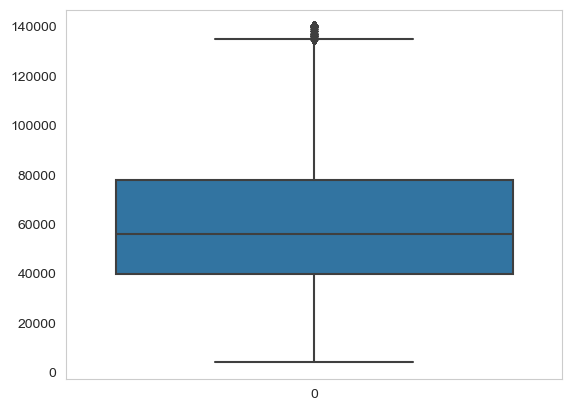

In [29]:
print(loan_df.annual_inc.describe())
sns.boxplot(loan_df['annual_inc'])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

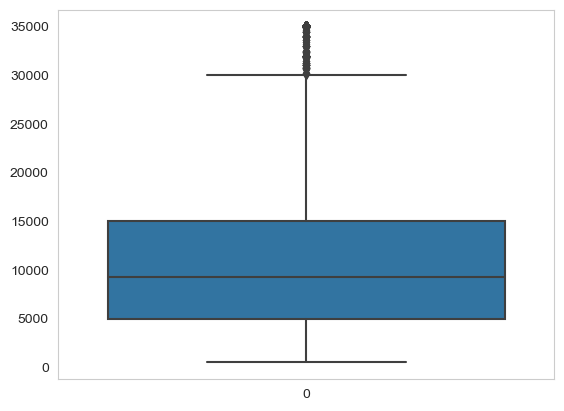

In [30]:
print(loan_df.loan_amnt.describe())
sns.boxplot(loan_df['loan_amnt'])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt, dtype: float64


<Axes: >

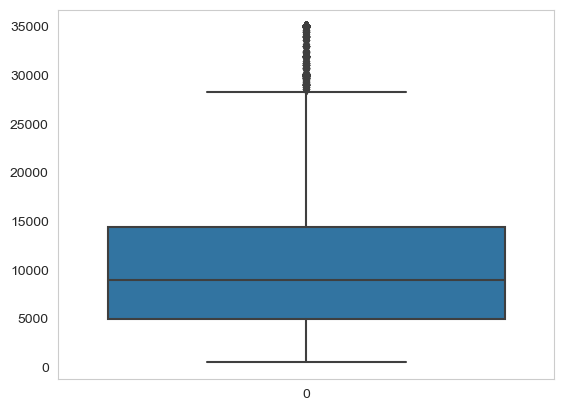

In [31]:
print(loan_df.funded_amnt.describe())
sns.boxplot(loan_df['funded_amnt'])

count    36654.000000
mean      9894.181349
std       6730.756232
min          0.000000
25%       4975.000000
50%       8375.000000
75%      13623.731415
max      35000.000000
Name: funded_amnt_inv, dtype: float64


<Axes: >

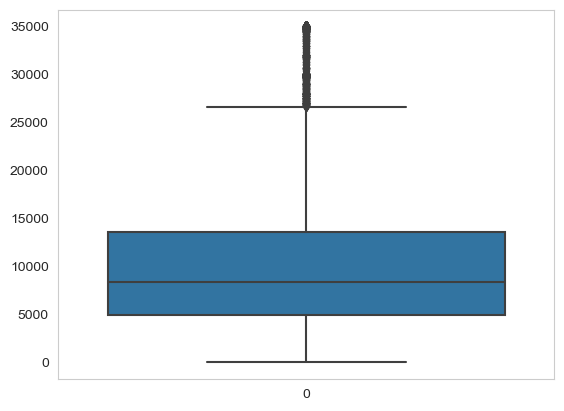

In [32]:
print(loan_df.funded_amnt_inv.describe())
sns.boxplot(loan_df['funded_amnt_inv'])

count    36654.000000
mean        48.596019
std         28.319039
min          0.000000
25%         25.200000
50%         48.900000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64


<Axes: >

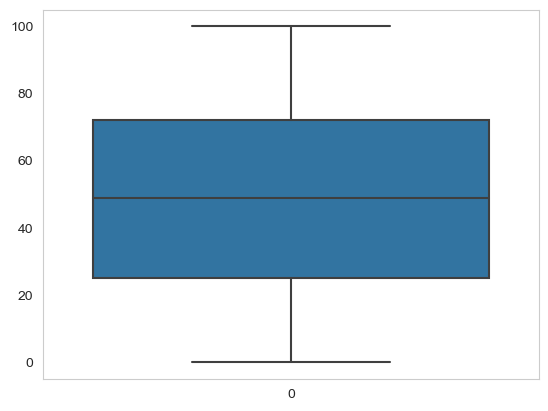

In [33]:
print(loan_df.revol_util.describe())
sns.boxplot(loan_df['revol_util'])

count     36654.000000
mean      12312.872265
std       13768.342283
min           0.000000
25%        3554.000000
50%        8498.000000
75%       16156.750000
max      149000.000000
Name: revol_bal, dtype: float64
0.90    26949.00
0.95    36774.75
0.99    69854.96
Name: revol_bal, dtype: float64


<Axes: >

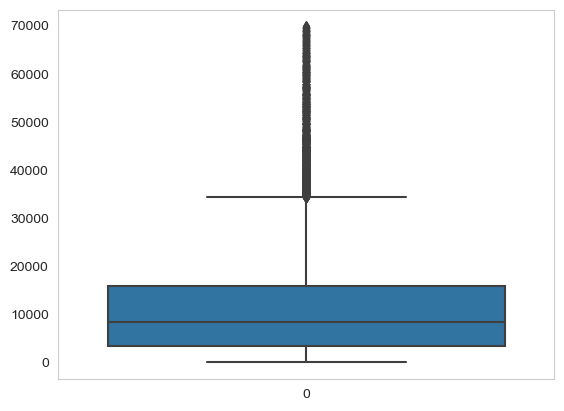

In [34]:
print(loan_df.revol_bal.describe())
print(loan_df.revol_bal.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'revol_bal',0.99)
sns.boxplot(loan_df['revol_bal'])

count    36287.000000
mean       310.798733
std        198.383882
min         15.690000
25%        162.870000
50%        269.520000
75%        407.170000
max       1305.190000
Name: installment, dtype: float64
0.90    586.34
0.95    702.26
0.99    896.22
Name: installment, dtype: float64


<Axes: >

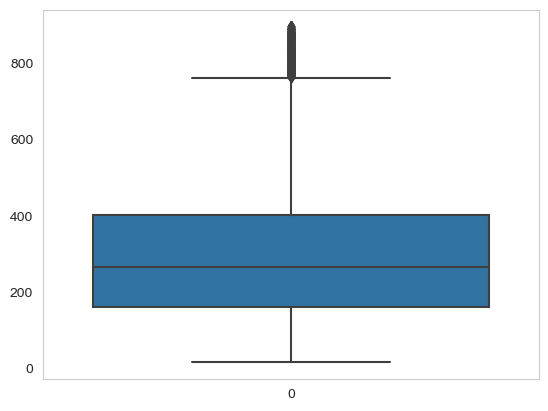

In [35]:
print(loan_df.installment.describe())
print(loan_df.installment.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'installment',0.99)
sns.boxplot(loan_df['installment'])

count    35927.000000
mean     11163.137528
std       8014.416710
min          0.000000
25%       5357.495672
50%       9246.920000
75%      15141.105665
max      53612.089680
Name: total_pymnt, dtype: float64
0.90    22393.366604
0.95    27436.369986
0.99    36621.344295
Name: total_pymnt, dtype: float64


<Axes: >

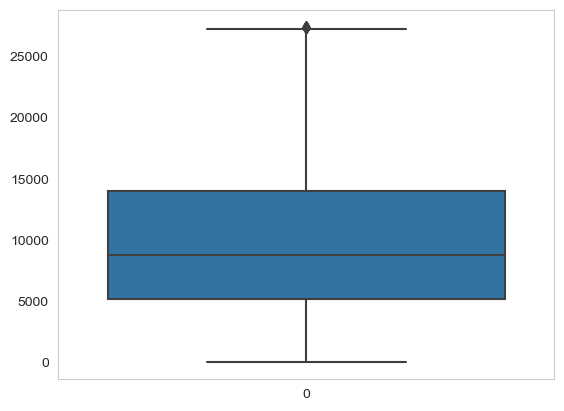

In [36]:
print(loan_df.total_pymnt.describe())
print(loan_df.total_pymnt.quantile([0.90,0.95,0.99]))
loan_df = outlier_treat(loan_df,'total_pymnt',0.95)
sns.boxplot(loan_df['total_pymnt'])

count    34130.000000
mean      1672.482613
std       1565.879000
min          0.000000
25%        595.865000
50%       1167.305000
75%       2236.480000
max      13482.630000
Name: total_rec_int, dtype: float64
0.90    3765.3750
0.95    4911.2330
0.99    7423.1728
Name: total_rec_int, dtype: float64


<Axes: >

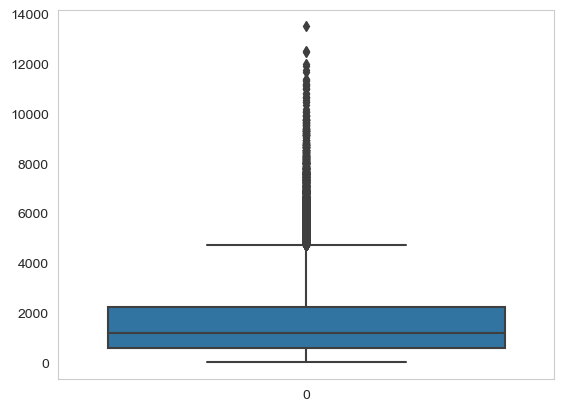

In [37]:
print(loan_df.total_rec_int.describe())
print(loan_df.total_rec_int.quantile([0.90,0.95,0.99]))
sns.boxplot(loan_df['total_rec_int'])

count    34130.000000
mean        13.345756
std          6.683005
min          0.000000
25%          8.190000
50%         13.450000
75%         18.650000
max         29.990000
Name: dti, dtype: float64
0.90    22.3600
0.95    23.8455
0.99    26.6171
Name: dti, dtype: float64


<Axes: >

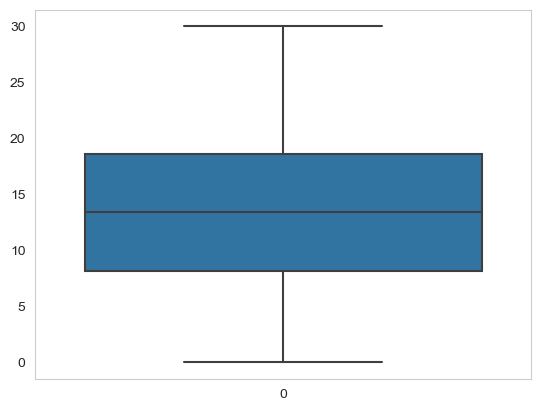

In [38]:
print(loan_df.dti.describe())
print(loan_df.dti.quantile([0.90,0.95,0.99]))
sns.boxplot(loan_df['dti'])

The preprocessing of data is complete and thereby now we move on to the univariate analysis to understand the relationship of various attributes with the target variable to derive meaningful insights

## Univariate Analysis

In [39]:
# distribution of 'term' of the loan
loan_df.groupby('term').size()/len(loan_df) * 100

term
36    77.978318
60    22.021682
dtype: float64

In [40]:
loan_df.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0    1296599       5000         5000           4975.0    36     10.65   
1    1314167       2500         2500           2500.0    60     15.27   
2    1313524       2400         2400           2400.0    36     15.96   
3    1277178      10000        10000          10000.0    36     13.49   
5    1311441       5000         5000           5000.0    36      7.90   

   installment grade sub_grade             emp_title  emp_length  \
0       162.87     B        B2                   NaN        10.0   
1        59.83     C        C4                 Ryder         0.0   
2        84.33     C        C5                   NaN        10.0   
3       339.31     C        C1   AIR RESOURCES BOARD        10.0   
5       156.46     A        A4  Veolia Transportaton         3.0   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

          purpose                                  title zip_code addr_state  \
0     credit_card                               Computer    860xx         AZ   
1             car                                   bike    309xx         GA   
2  small_business                   real estate business    606xx         IL   
3           other                               personel    917xx         CA   
5         wedding  My wedding loan I promise to pay back    852xx         AZ   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
0  27.65            0           Jan-85               1         3        0   
1   1.00            0           Apr-99               5         3        0   
2   8.72            0           Nov-01               2         2        0   
3  20.00            0           Feb-96               1        10        0   
5  11.20            0           Nov-04               3         9        0   

   revol_bal  revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0      13648        83.7          9   5863.155187          5833.84   
1       1687         9.4          4   1008.710000          1008.71   
2       2956        98.5         10   3005.666844          3005.67   
3       5598        21.0         37  12231.890000         12231.89   
5       7963        28.3         12   5632.210000          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15           171.62             May-16   
1                     1.11       Apr-13           119.66             Sep-13   
2                     0.00       Jun-14           649.91             May-16   
3                     0.00       Jan-15           357.48             Apr-16   
5                     0.00       Jan-15           161.03             Jan-16   

   pub_rec_bankruptcies  loan_status_flag  log_annual_inc  log_revol_bal  \
0                   0.0                 1        4.380211       4.135069   
1                   0.0                 0        4.477121       3.227115   
2                   0.0                 1        4.088207       3.470704   
3                   0.0                 1        4.691965       3.748033   
5                   0.0                 1        4.556303       3.901077   

   e

In [41]:
# distribution of 'loan_status' of the loan
loan_df.loan_status.value_counts(normalize = True)*100

Fully Paid     84.685028
Charged Off    15.314972
Name: loan_status, dtype: float64

Observation: As per the above derived data, we observe that Charged off loans make up for 15.3% of the overall loans compared to fully paid which contributes to the rest 84.7%

1    88.569926
0    11.430074
Name: loan_status_flag, dtype: float64


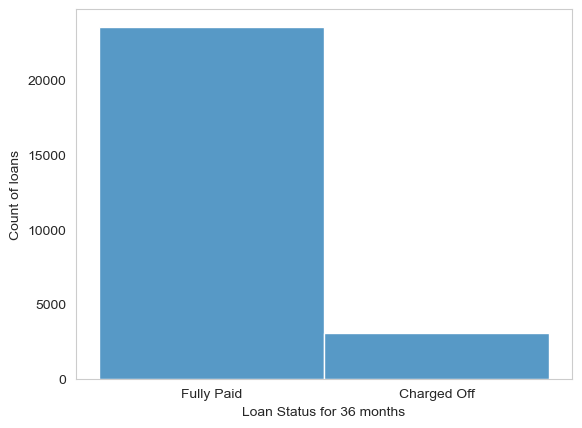

In [42]:
#The loan tenure of charged off vs fully repoaid in 36 months
loan_df_36 = loan_df[loan_df.term == 36]
sns.histplot(loan_df_36.loan_status)
plt.xlabel('Loan Status for 36 months')
plt.ylabel('Count of loans')
print(loan_df_36.loan_status_flag.value_counts(normalize = True)*100)

1    70.928685
0    29.071315
Name: loan_status_flag, dtype: float64


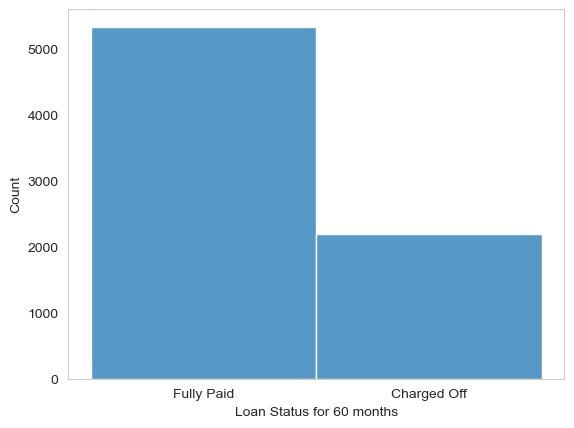

In [167]:
#The loan tenure of charged off vs fully repoaid in 60 months
loan_df_60 = loan_df[loan_df.term == 60]
sns.histplot(loan_df_60.loan_status)
plt.xlabel('Loan Status for 60 months')
print(loan_df_60.loan_status_flag.value_counts(normalize = True)*100)

Inference: From the above plot and computation it is observed that loan with higher term i.e. 60 months shows higher Charged off percentage i.e approx 30 percent. This is an indication to some extent that loans with higher term period are likely to default more

In [44]:
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        50.553765
MORTGAGE    41.274539
OWN          7.899209
OTHER        0.263698
NONE         0.008790
Name: home_ownership, dtype: float64

In [45]:
# replacing 'NONE' with 'OTHER'
loan_df.home_ownership.replace('NONE','OTHER', inplace =True)
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        50.553765
MORTGAGE    41.274539
OWN          7.899209
OTHER        0.272488
Name: home_ownership, dtype: float64

<Axes: xlabel='home_ownership', ylabel='Count'>

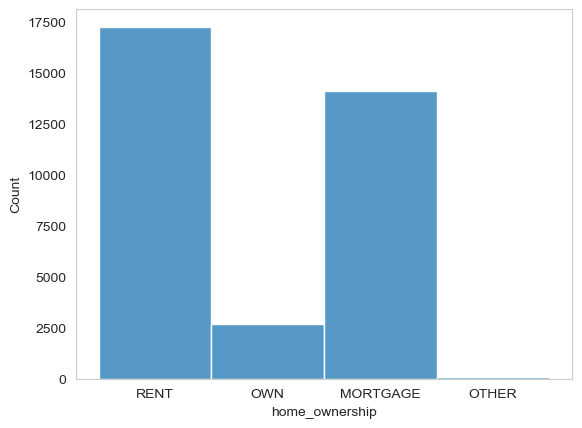

In [46]:
sns.color_palette("colorblind")
sns.histplot(loan_df.home_ownership)



### Defining a Function for Analyzing the Columns with 'Charged Off', 'Fully Paid' and 'Both Charged Off and 'Fully Paid'

In [47]:
def plot_hist(df_nm,col_nm,status_flag):
    df_nm.sort_values(col_nm, ascending = False, inplace = True)
    if status_flag != 3:
        df_nm = df_nm[df_nm.loan_status_flag == status_flag]
        
    
    if col_nm in ['purpose','sub_grade']: 
        plt.figure(figsize = (25,5))
    else:       
        plt.figure(figsize = (8,4))
    
    plt.ylabel('Frequency')
    
    sns.histplot(df_nm[col_nm])
    if(status_flag == 1 ):
        
        plt.xlabel(col_nm +' fully paid')
    elif (status_flag == 0 ) :
        plt.xlabel(col_nm +' charged off') 
    elif (status_flag == 3):
        plt.xlabel(col_nm)

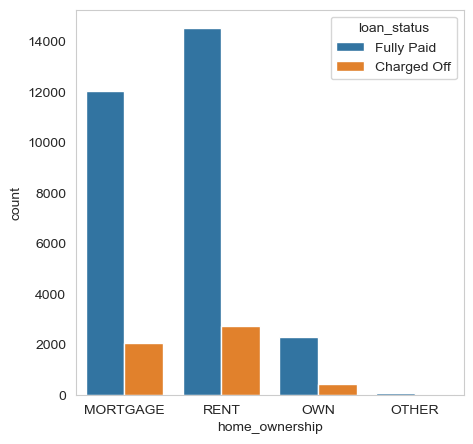

In [154]:
#Distribution of home ownership
plt.figure(figsize = (5,5))
sns.countplot(x= loan_df['home_ownership'], hue = loan_df['loan_status'])
plt.show()

In [166]:
df_ls_hm1 = loan_df.groupby(['home_ownership','loan_status']).agg(loan_count = ('loan_status','count'))
df_ls_hm1.reset_index(inplace=True)
df_ls_hm2 = df_ls_hm1.groupby(['home_ownership']).agg(total_loan_count = ('loan_count','sum'))
df_ls_hm2.reset_index(inplace=True)

df_ls_hm_merged = pd.merge(df_ls_hm1,df_ls_hm2,on=['home_ownership'],how='inner')
df_ls_hm_merged['loan_count_%'] = (df_ls_hm_merged['loan_count']/df_ls_hm_merged['total_loan_count'])*100
df_ls_hm_merged.head(20)


home_ownership  loan_status  loan_count  total_loan_count  loan_count_%
0       MORTGAGE  Charged Off        2065             14087     14.658905
1       MORTGAGE   Fully Paid       12022             14087     85.341095
2          OTHER  Charged Off          16                93     17.204301
3          OTHER   Fully Paid          77                93     82.795699
4            OWN  Charged Off         420              2696     15.578635
5            OWN   Fully Paid        2276              2696     84.421365
6           RENT  Charged Off        2726             17254     15.799235
7           RENT   Fully Paid       14528             17254     84.200765

Inference: While it is observed that for loans under Rent and Mortgage ownership type, the count of loans is higher however from the above table it is observed that the home ownership type does not have much relevance or impact on whether a borrower is likely to default and therefore we believe this variable is not useful to the analysis from a univariate standpoint 

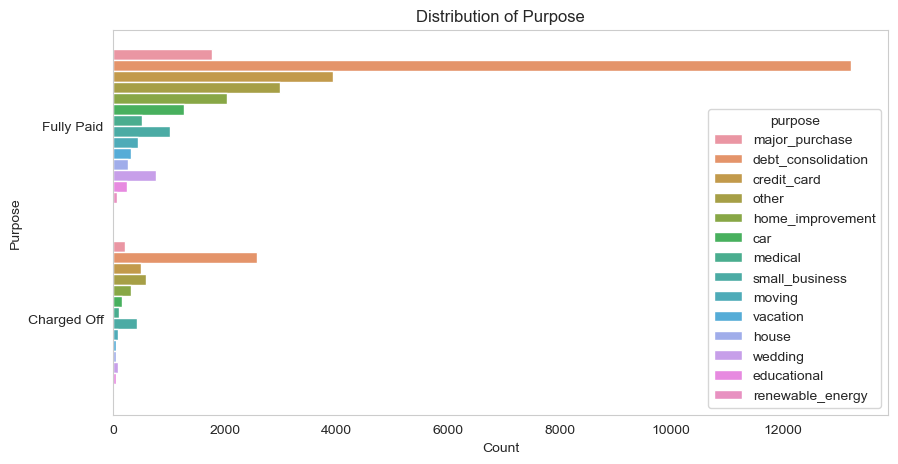

In [178]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(hue= loan_df['purpose'], y = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()


In [179]:
df_ls_p1 = loan_df.groupby(['purpose','loan_status']).agg(loan_count = ('loan_status','count'))
df_ls_p1.reset_index(inplace=True)
df_ls_p2 = df_ls_p1.groupby(['purpose']).agg(total_loan_count = ('loan_count','sum'))
df_ls_p2.reset_index(inplace=True)

df_ls_p_merged = pd.merge(df_ls_p1,df_ls_p2,on=['purpose'],how='inner')
df_ls_p_merged['loan_count_%'] = (df_ls_p_merged['loan_count']/df_ls_p_merged['total_loan_count'])*100
df_ls_p_merged.head(20)

purpose  loan_status  loan_count  total_loan_count  \
0                  car  Charged Off         158              1426   
1                  car   Fully Paid        1268              1426   
2          credit_card  Charged Off         499              4442   
3          credit_card   Fully Paid        3943              4442   
4   debt_consolidation  Charged Off        2570             15799   
5   debt_consolidation   Fully Paid       13229             15799   
6          educational  Charged Off          54               307   
7          educational   Fully Paid         253               307   
8     home_improvement  Charged Off         311              2360   
9     home_improvement   Fully Paid        2049              2360   
10               house  Charged Off          51               309   
11               house   Fully Paid         258               309   
12      major_purchase  Charged Off         215              1987   
13      major_purchase   Fully Paid        1772              1987   
14             medical  Charged Off         103               628   
15             medical   Fully Paid         525               628   
16              moving  Charged Off          90               543   
17              moving   Fully Paid         453               543   
18               other  Charged Off         590              3572   
19               other   Fully Paid        2982              3572   

    loan_count_%  
0      11.079944  
1      88.920056  
2      11.233679  
3      88.766321  
4      16.266852  
5      83.733148  
6      17.589577  
7      82.410423  
8      13.177966  
9      86.822034  
10     16.504854  
11     83.495146  
12     10.820332  
13     89.179668  
14     16.401274  
15     83.598726  
16     16.574586  
17     83.425414  
18     16.517357  
19     83.482643

Inference: It is observed that around 49% of the charge off loans have orginated under the purpose of debt_consolidation along with that we also observe higher charge off percentage (16.3% of charge off loans) which indicates that 'debt consolidation' associated loans have a higher likeliness to default

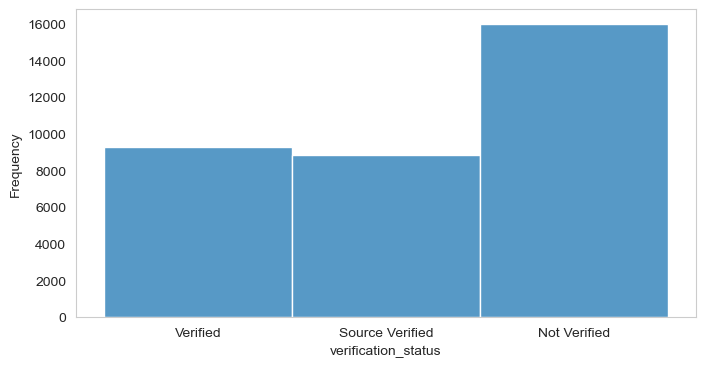

In [53]:
plot_hist(loan_df,'verification_status',3)

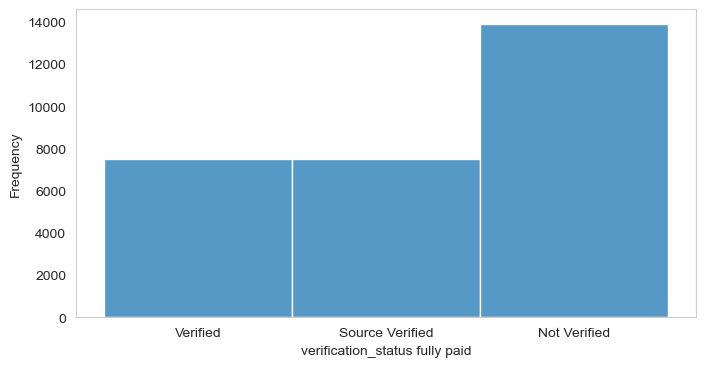

In [54]:
plot_hist(loan_df,'verification_status',1)

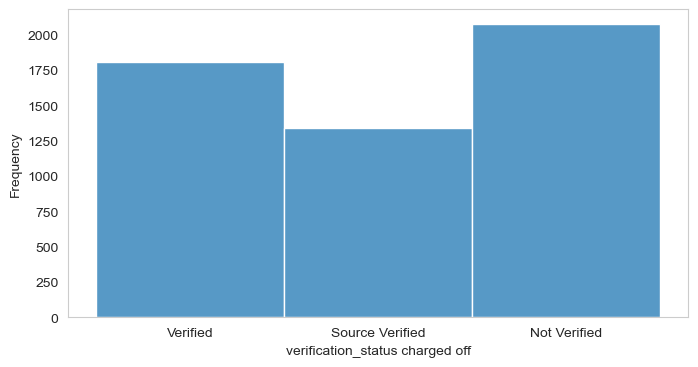

In [55]:
plot_hist(loan_df,'verification_status',0)

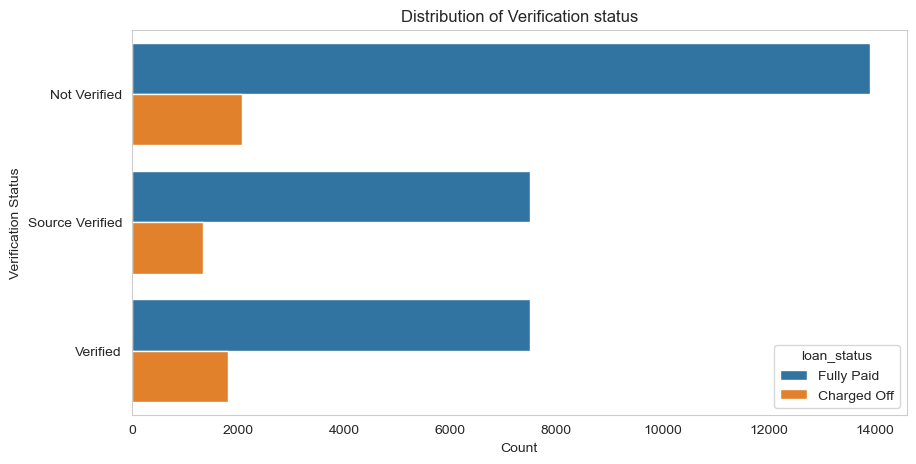

In [181]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(y= loan_df['verification_status'],hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Verification Status')
plt.title('Distribution of Verification status',fontsize=12)
plt.show()


In [183]:
df_ls_vs1 = loan_df.groupby(['verification_status','loan_status']).agg(loan_count = ('loan_status','count'))
df_ls_vs1.reset_index(inplace=True)
df_ls_vs2 = df_ls_vs1.groupby(['verification_status']).agg(total_loan_count = ('loan_count','sum'))
df_ls_vs2.reset_index(inplace=True)

df_ls_vs_merged = pd.merge(df_ls_vs1,df_ls_vs2,on=['verification_status'],how='inner')
df_ls_vs_merged['loan_count_%'] = (df_ls_vs_merged['loan_count']/df_ls_vs_merged['total_loan_count'])*100
df_ls_vs_merged.head(20)

verification_status  loan_status  loan_count  total_loan_count  loan_count_%
0        Not Verified  Charged Off        2076             15987     12.985551
1        Not Verified   Fully Paid       13911             15987     87.014449
2     Source Verified  Charged Off        1343              8839     15.194026
3     Source Verified   Fully Paid        7496              8839     84.805974
4            Verified  Charged Off        1808              9304     19.432502
5            Verified   Fully Paid        7496              9304     80.567498

Inference: Based on the above observation - charts and tables, it can be noted that even if the verified borrowers by LC are less than the unverified (9300 vs 16000 approx) however the verified borrower category has displayed larger charge off percentage (19.5%) which is an indication that this category (verified by LC) is more likely to default based on the dataset provided.

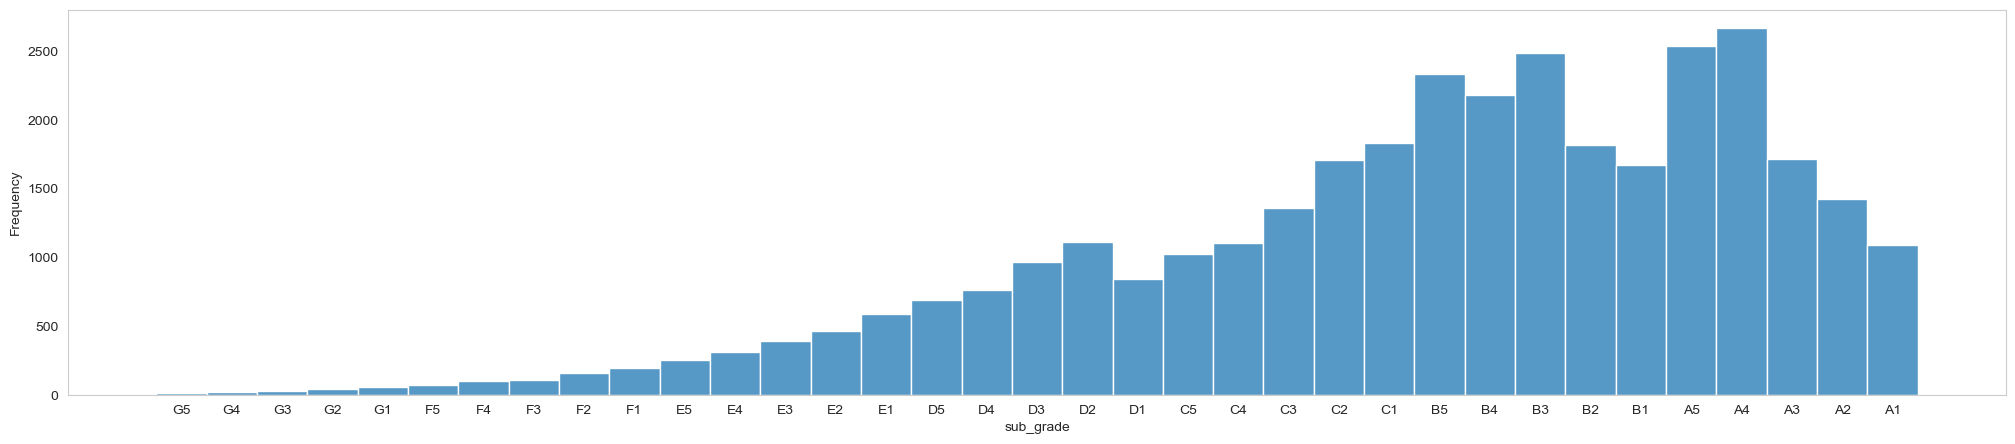

In [57]:
# subgrade
plot_hist(loan_df,'sub_grade',3)

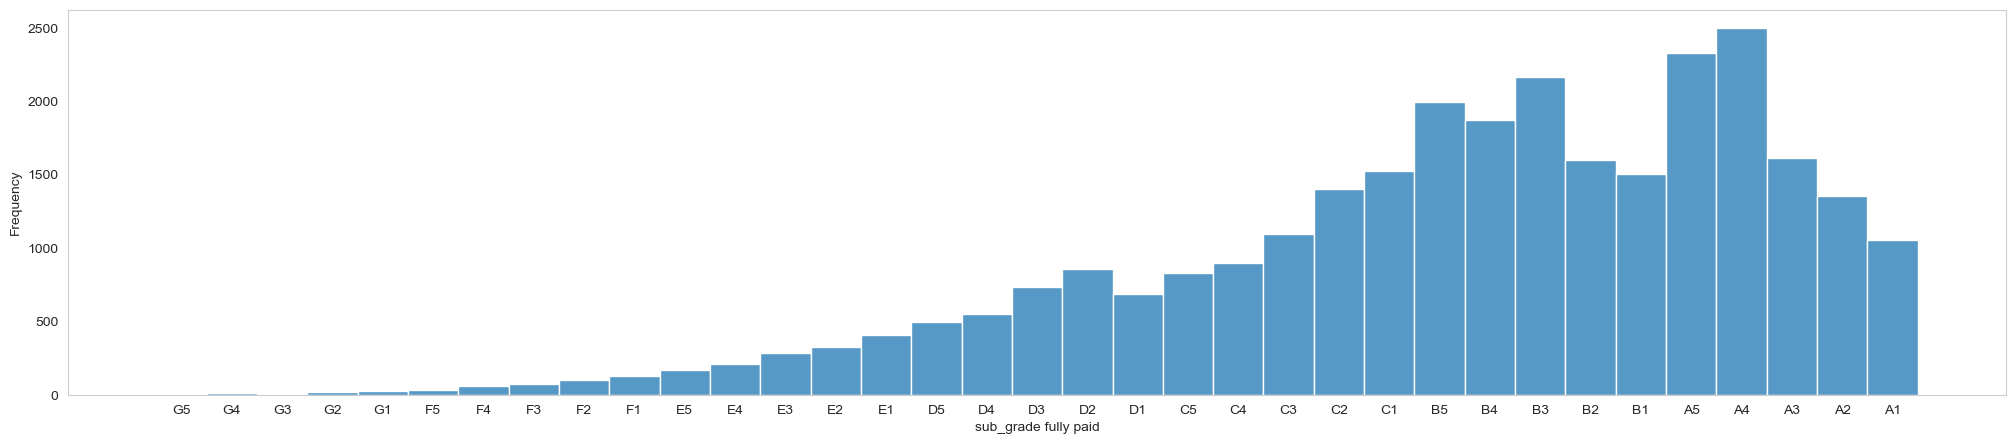

In [58]:
plot_hist(loan_df,'sub_grade',1)

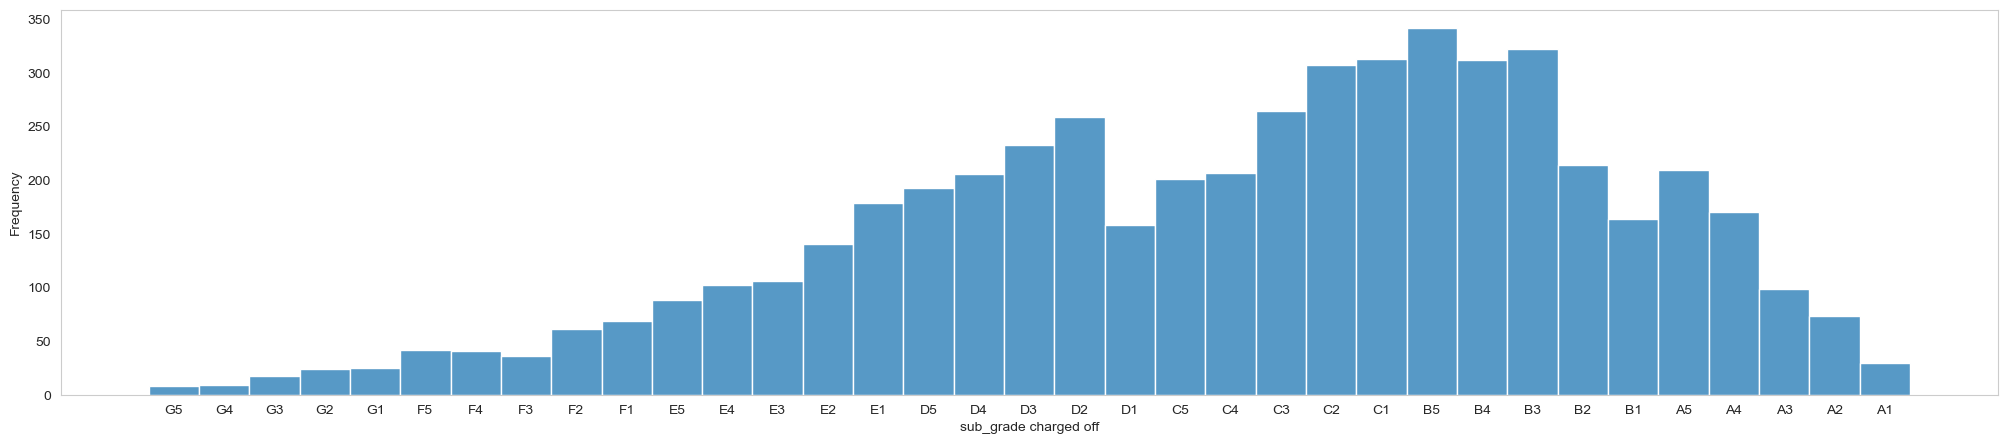

In [59]:
plot_hist(loan_df,'sub_grade',0)

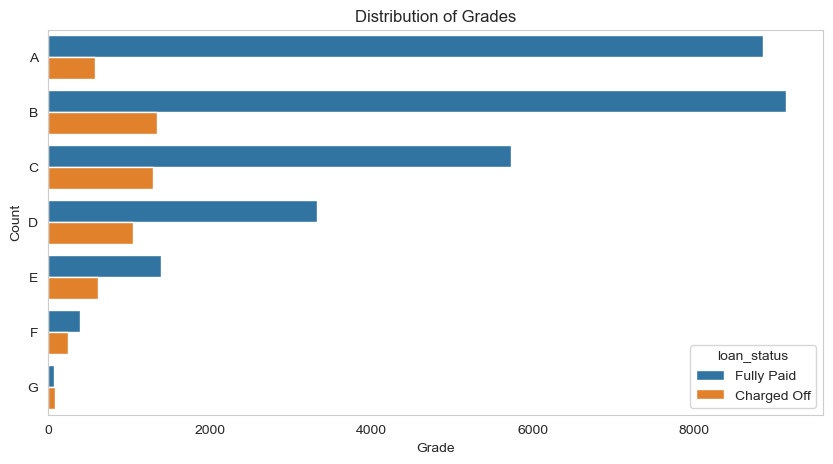

In [187]:
# Distribution of grades
plt.figure(figsize=(10,5))
sns.countplot(y= loan_df['grade'].sort_values(),hue = loan_df['loan_status'])
plt.ylabel('Count')
plt.xlabel('Grade')
plt.title('Distribution of Grades',fontsize=12)
plt.show()

In [223]:
def loan_status_percent(df1,col1, col2):
    
    df_ls_v1 = df1.groupby([col1,col2]).agg(loan_count = (col2,'count'))
    df_ls_v1.reset_index(inplace=True)
    df_ls_v2 = df_ls_v1.groupby([col1]).agg(total_loan_count = ('loan_count','sum'))
    df_ls_v2.reset_index(inplace=True)

    df_ls_v_merged = pd.merge(df_ls_v1,df_ls_v2,on=[col1],how='inner')
    df_ls_v_merged['loan_count_%'] = (df_ls_v_merged['loan_count']/df_ls_v_merged['total_loan_count'])*100
    df_ls_v_merged1=df_ls_v_merged[df_ls_v_merged[col2]=='Charged Off']
    plt.figure(figsize=(10,5))
    sns.barplot(x= df_ls_v_merged1[col1].sort_values(),hue= df_ls_v_merged1[col2] ,y = df_ls_v_merged1['loan_count_%'])
    return df_ls_v_merged


   grade  loan_status  loan_count  total_loan_count  loan_count_%
0      A  Charged Off         582              9430      6.171792
1      A   Fully Paid        8848              9430     93.828208
2      B  Charged Off        1354             10489     12.908762
3      B   Fully Paid        9135             10489     87.091238
4      C  Charged Off        1294              7030     18.406828
5      C   Fully Paid        5736              7030     81.593172
6      D  Charged Off        1049              4374     23.982625
7      D   Fully Paid        3325              4374     76.017375
8      E  Charged Off         616              2013     30.601093
9      E   Fully Paid        1397              2013     69.398907
10     F  Charged Off         249               639     38.967136
11     F   Fully Paid         390               639     61.032864
12     G  Charged Off          83               155     53.548387
13     G   Fully Paid          72               155     46.451613


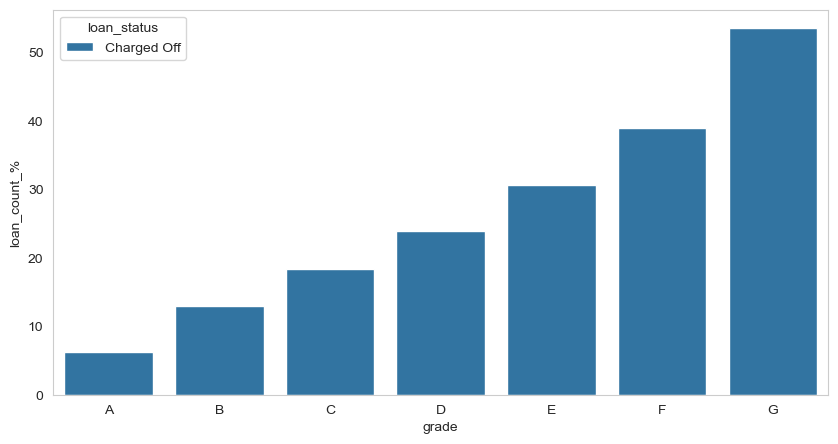

In [224]:
print(loan_status_percent(loan_df,'grade','loan_status'))

Observation on 'Grade' categories: Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is also observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

Inference: It can be inferred based on the observation above that loans belonging to sub prime grades i.e. as we move from A,B towards G we observe that the charge off percentage increases which indicates the the loans with sub-prime grades are much more riskier and much more likely to default

In [62]:
#Employement Length
loan_df.emp_length.unique()

array([ 3.,  5., 10.,  0.,  2.,  4.,  1.,  7.,  6.,  8.,  9.])

In [196]:
print(loan_df['emp_length'].describe())


count    34130.000000
mean         4.955318
std          3.583215
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


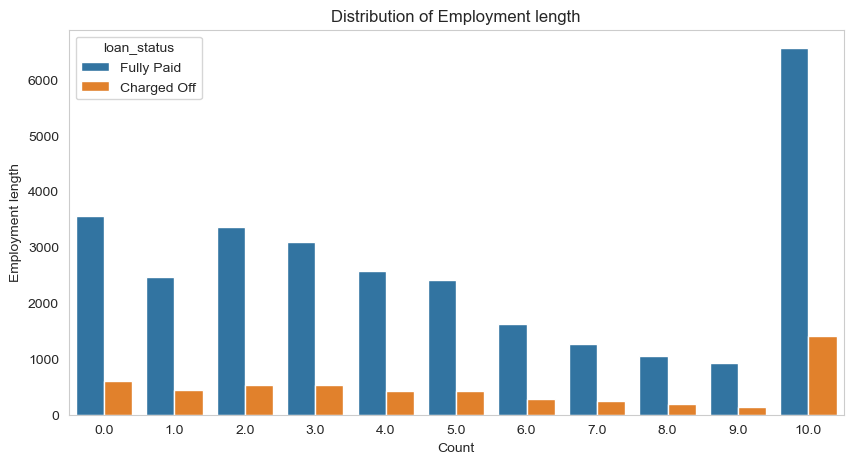

In [195]:
# Distribution of employment length
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['emp_length'].sort_values(),hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Employment length')
plt.title('Distribution of Employment length',fontsize=12)
plt.show()

    emp_length  loan_status  loan_count  total_loan_count  loan_count_%
0          0.0  Charged Off         599              4148     14.440694
1          0.0   Fully Paid        3549              4148     85.559306
2          1.0  Charged Off         441              2909     15.159849
3          1.0   Fully Paid        2468              2909     84.840151
4          2.0  Charged Off         537              3894     13.790447
5          2.0   Fully Paid        3357              3894     86.209553
6          3.0  Charged Off         526              3622     14.522363
7          3.0   Fully Paid        3096              3622     85.477637
8          4.0  Charged Off         428              3008     14.228723
9          4.0   Fully Paid        2580              3008     85.771277
10         5.0  Charged Off         425              2843     14.948998
11         5.0   Fully Paid        2418              2843     85.051002
12         6.0  Charged Off         284              1915     14

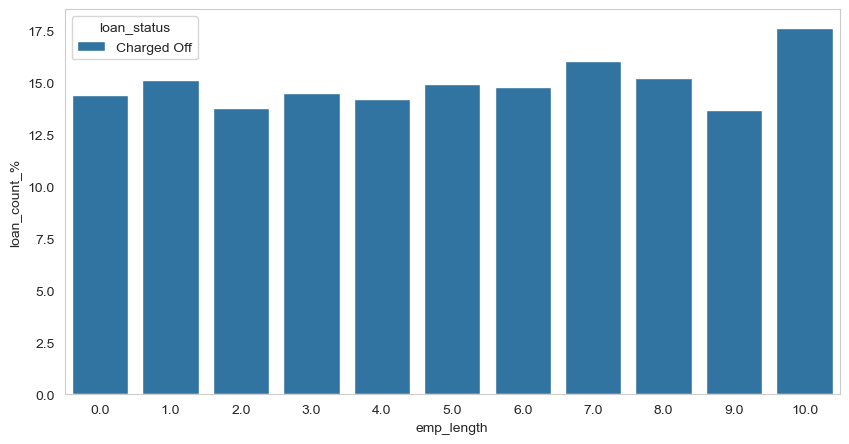

In [225]:
print(loan_status_percent(loan_df,'emp_length','loan_status'))

Observation and Inference: From the above charts and tables it is observed that borrowers with employment length >10yrs have a higher no of loans(fully paid and charge off loans) as well as we notice the charge off% to be marginally higher for borrowers with employment length >10yrs. Based on the above graph we can conclude that employment length can not be considered as a primary indicator given it is unable to provide any concrete evident to suggest the influence towards defaulting.

# annual income

In [67]:
loan_df.groupby('loan_status')['annual_inc'].describe()

count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5227.0  55176.622518  25756.440032  4080.0  36000.0  50004.0   
Fully Paid   28903.0  59433.472416  26873.633561  4000.0  39996.0  55000.0   

                 75%       max  
loan_status                     
Charged Off  70000.0  140004.0  
Fully Paid   75000.0  140004.0

In [68]:
loan_df['annual_inc'].describe()

count     34130.000000
mean      58781.537039
std       26749.164946
min        4000.000000
25%       39000.000000
50%       54300.000000
75%       75000.000000
max      140004.000000
Name: annual_inc, dtype: float64

In [233]:
# categorizing the 'annual income' to various categories/ bins
def annual_inc_cat(x):
    x = int(x)
    if x < 25000:
        return '0-25000'
    elif x>=25000 and x<50000:
        return '25000-50000'
    elif x>=50000 and x<75000:
        return '50000-75000'
    elif x>=75000 and x<100000:
        return '75000-100000'
    else:
        return 'more than 100,000'
    


In [234]:
loan_df['annual_inc_cat'] = loan_df['annual_inc'].apply(lambda x : annual_inc_cat(x))
loan_df[['annual_inc','annual_inc_cat']].head()

annual_inc     annual_inc_cat
32474     72900.0        50000-75000
28779    102000.0  more than 100,000
31131     43200.0        25000-50000
21327     62000.0        50000-75000
36359     72000.0        50000-75000

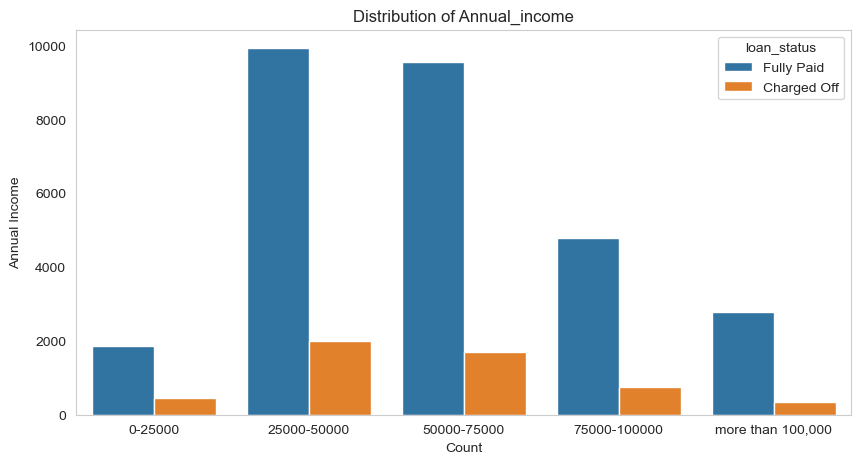

In [235]:
# Distribution of Annual income
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['annual_inc_cat'].sort_values(),hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual_income',fontsize=12)
plt.show()

      annual_inc_cat  loan_status  loan_count  total_loan_count  loan_count_%
0            0-25000  Charged Off         450              2303     19.539731
1            0-25000   Fully Paid        1853              2303     80.460269
2        25000-50000  Charged Off        1989             11921     16.684842
3        25000-50000   Fully Paid        9932             11921     83.315158
4        50000-75000  Charged Off        1694             11242     15.068493
5        50000-75000   Fully Paid        9548             11242     84.931507
6       75000-100000  Charged Off         742              5527     13.425005
7       75000-100000   Fully Paid        4785              5527     86.574995
8  more than 100,000  Charged Off         352              3137     11.220912
9  more than 100,000   Fully Paid        2785              3137     88.779088


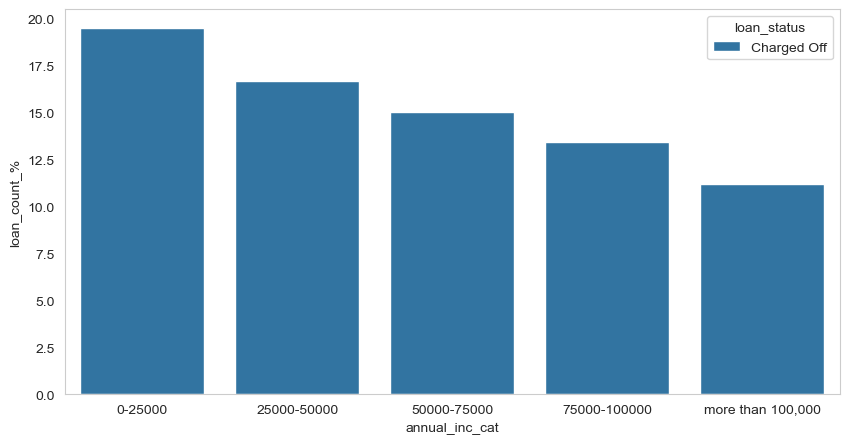

In [236]:
print(loan_status_percent(loan_df,'annual_inc_cat','loan_status'))

<Axes: xlabel='loan_status', ylabel='annual_inc'>

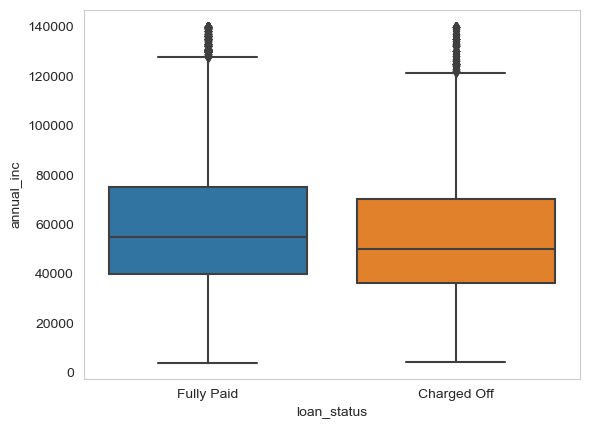

In [73]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'] ,y = loan_df['annual_inc'])

In [74]:
loan_df.groupby('loan_status')['log_annual_inc'].describe()

count      mean       std      min       25%       50%  \
loan_status                                                             
Charged Off   5227.0  4.692475  0.214861  3.61066  4.556303  4.699005   
Fully Paid   28903.0  4.727168  0.209421  3.60206  4.602017  4.740363   

                  75%      max  
loan_status                     
Charged Off  4.845098  5.14614  
Fully Paid   4.875061  5.14614

<Axes: xlabel='loan_status', ylabel='log_annual_inc'>

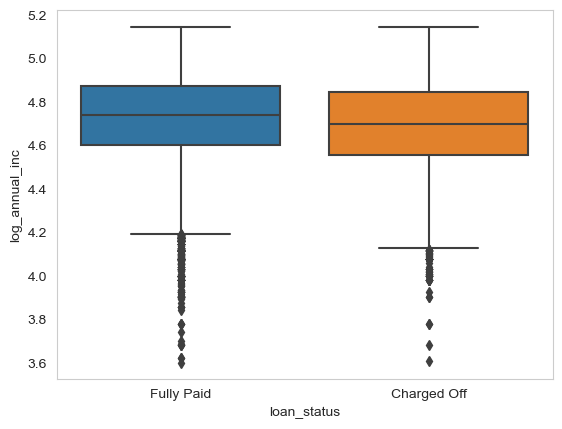

In [75]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'] ,y = loan_df['log_annual_inc'])

Observation: Based on observations noted below we can infer that higher income accounts are less likely to Default:
1. Charged Off accounts have less spread of Income when compared to Fully Paid accounts
2. The Charge off% decreased with increasing income groups


# Interest rate

In [76]:
loan_df.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   5227.0  13.658018  3.575602  5.42  11.14  13.49  16.07  24.40
Fully Paid   28903.0  11.321984  3.437661  5.42   8.00  11.14  13.61  23.91

<Axes: xlabel='loan_status', ylabel='int_rate'>

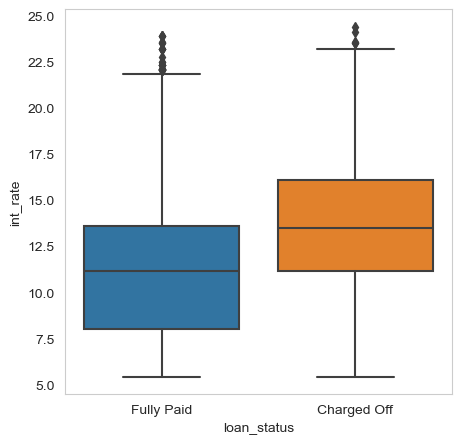

In [77]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['int_rate'] )

In [78]:
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

Text(0.5, 0, 'Interest Rate')

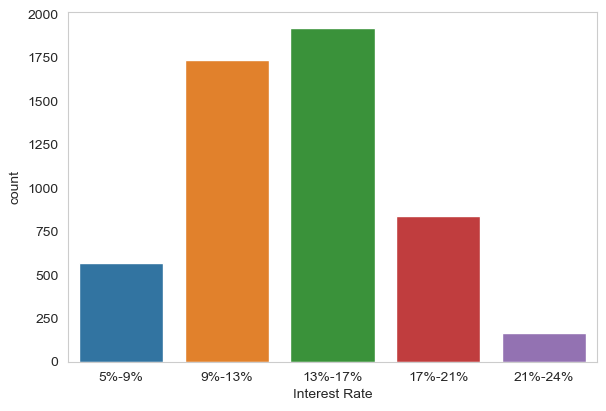

In [79]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

  int_rate_groups  loan_status  loan_count  total_loan_count  loan_count_%
0           5%-9%  Charged Off         568              9229      6.154513
1           5%-9%   Fully Paid        8661              9229     93.845487
2          9%-13%  Charged Off        1738             12762     13.618555
3          9%-13%   Fully Paid       11024             12762     86.381445
4         13%-17%  Charged Off        1919              9409     20.395366
5         13%-17%   Fully Paid        7490              9409     79.604634
6         17%-21%  Charged Off         838              2439     34.358344
7         17%-21%   Fully Paid        1601              2439     65.641656
8         21%-24%  Charged Off         164               291     56.357388
9         21%-24%   Fully Paid         127               291     43.642612


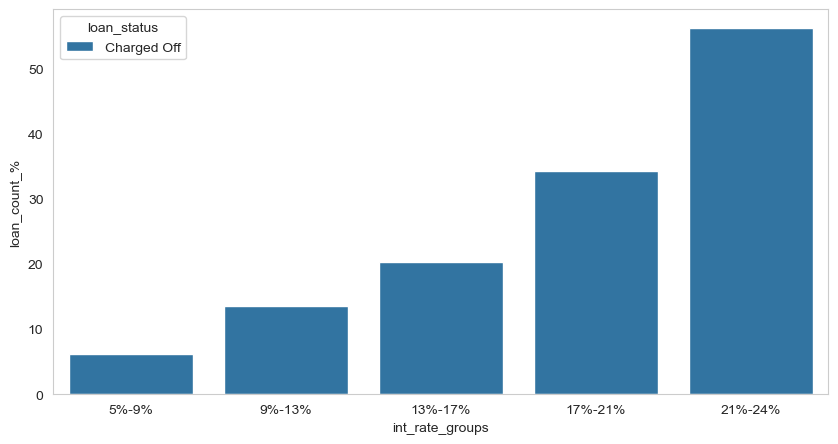

In [237]:
print(loan_status_percent(loan_df,'int_rate_groups','loan_status'))

Observation: 'Charged Off' accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%. However since this information regarding interest rate is not available before a borrower is onboarded therefore this variable will not add any value to the overall analysis which is why we can ignore this feature in the context of univariate analysis.

# installment

In [80]:
loan_df.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%     50%      75%  \
loan_status                                                                    
Charged Off   5227.0  312.345653  190.412144  22.79  165.06  278.65  419.840   
Fully Paid   28903.0  277.739216  158.183388  15.69  156.48  250.49  371.585   

                max  
loan_status          
Charged Off  892.30  
Fully Paid   888.14

<Axes: xlabel='loan_status', ylabel='installment'>

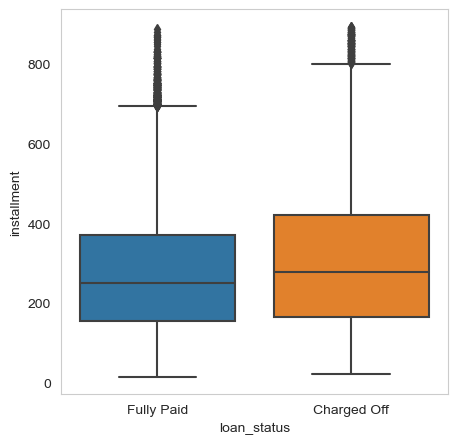

In [81]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['installment'] )

Observation: Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

# dti

In [82]:
# dti
loan_df.groupby('loan_status')['dti'].describe()

count       mean       std  min   25%    50%     75%    max
loan_status                                                               
Charged Off   5227.0  14.076164  6.602146  0.0  9.15  14.36  19.395  29.85
Fully Paid   28903.0  13.213665  6.689126  0.0  8.03  13.27  18.510  29.99

<Axes: xlabel='loan_status', ylabel='dti'>

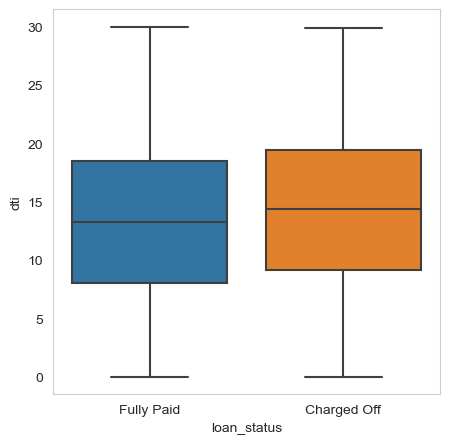

In [83]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['dti'] )

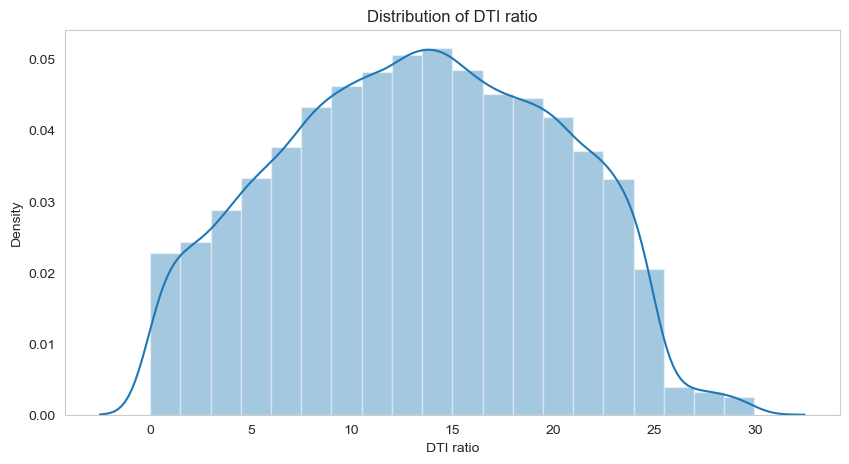

In [84]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Observation: Charged Off loans have marginally higher dti when compared to Fully Paid loans. 

# earliest credit line

In [85]:
loan_df.groupby('loan_status')['earliest_cr_line_yr'].describe()

count         mean       std     min     25%     50%     75%  \
loan_status                                                                   
Charged Off   5227.0  1997.184427  6.722483  1962.0  1994.0  1998.0  2002.0   
Fully Paid   28903.0  1996.985399  6.729652  1946.0  1994.0  1998.0  2002.0   

                max  
loan_status          
Charged Off  2008.0  
Fully Paid   2008.0

In [86]:
# categorizing the 'earliest credit line'
def year_cat(x):
    if x < 1980:
        return 'pre_80s'
    elif x>=1980 and x<1990:
        return '80s'
    elif x>=1990 and x<2000:
        return '90s'
    else:
        return 'in_2000s'
    
loan_df['earliest_cr_line_yr_cat'] = loan_df['earliest_cr_line_yr'].apply(lambda x : year_cat(x))
loan_df['earliest_cr_line_yr_cat'].head()

12417         90s
9184          90s
29478         90s
33345         80s
5858     in_2000s
Name: earliest_cr_line_yr_cat, dtype: object

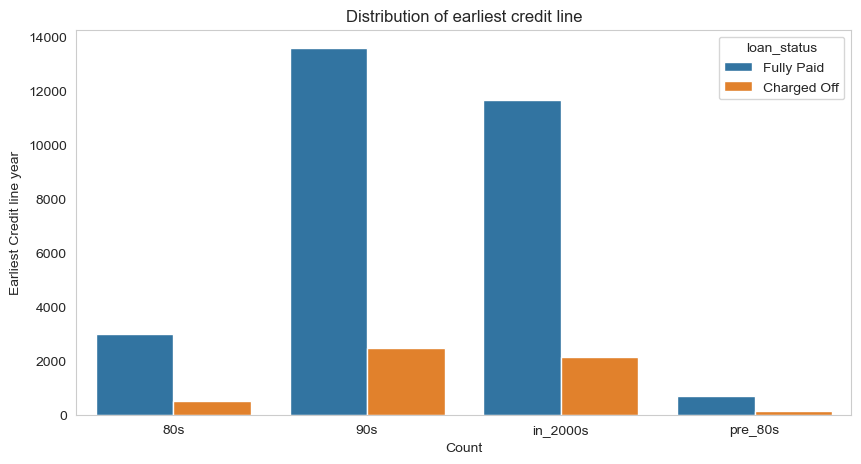

In [239]:

# Distribution of earliest credit line
plt.figure(figsize=(10,5))
sns.countplot(x= loan_df['earliest_cr_line_yr_cat'].sort_values(),hue = loan_df['loan_status'])
plt.xlabel('Count')
plt.ylabel('Earliest Credit line year')
plt.title('Distribution of earliest credit line',fontsize=12)
plt.show()

  earliest_cr_line_yr_cat  loan_status  loan_count  total_loan_count  \
0                     80s  Charged Off         519              3499   
1                     80s   Fully Paid        2980              3499   
2                     90s  Charged Off        2453             16032   
3                     90s   Fully Paid       13579             16032   
4                in_2000s  Charged Off        2135             13791   
5                in_2000s   Fully Paid       11656             13791   
6                 pre_80s  Charged Off         120               808   
7                 pre_80s   Fully Paid         688               808   

   loan_count_%  
0     14.832809  
1     85.167191  
2     15.300649  
3     84.699351  
4     15.481111  
5     84.518889  
6     14.851485  
7     85.148515  


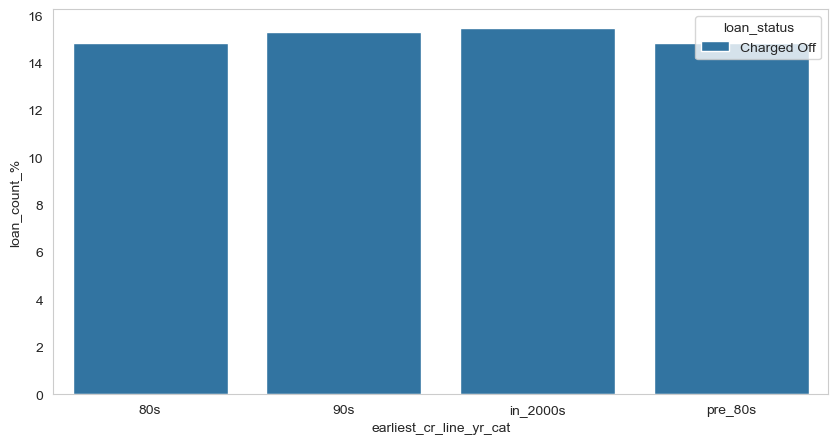

In [240]:
print(loan_status_percent(loan_df,'earliest_cr_line_yr_cat','loan_status'))

Based on the above data, the insights are inconclusive and therefore we do not consider this feature to be beneficial to the analysis in the context of univariate exercise

# delinq_2yrs

In [90]:
loan_df.groupby('loan_status')['delinq_2yrs'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                       
Charged Off   5227.0  0.169696  0.534762  0.0  0.0  0.0  0.0   8.0
Fully Paid   28903.0  0.142200  0.487316  0.0  0.0  0.0  0.0  11.0

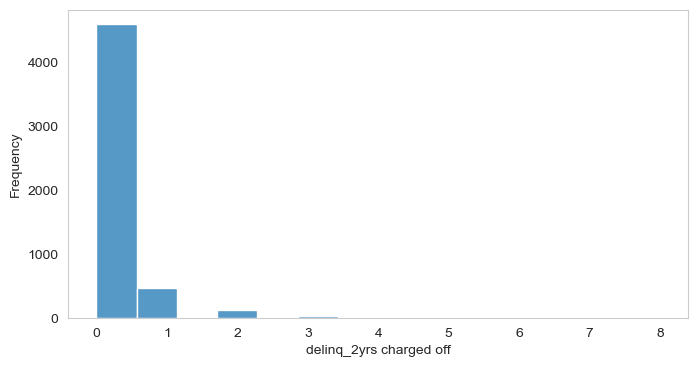

In [91]:
plot_hist(loan_df,'delinq_2yrs',0)

currently we cannot conclude anything, but delinquency may be used in further, while carrying out Bivariate analysis

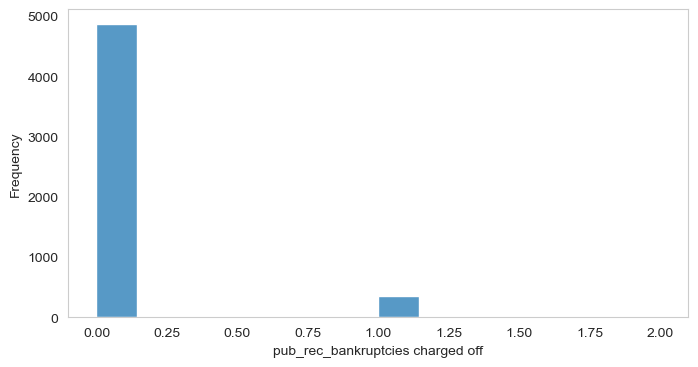

In [92]:
#Charged Off
plot_hist(loan_df, 'pub_rec_bankruptcies', 0)

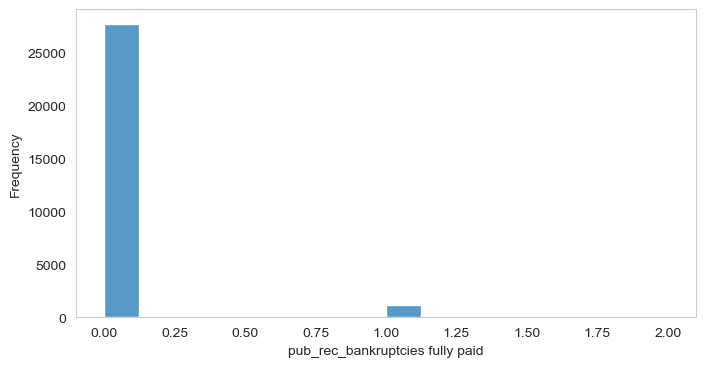

In [93]:
# Fully Paid
plot_hist(loan_df, 'pub_rec_bankruptcies', 1)

It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

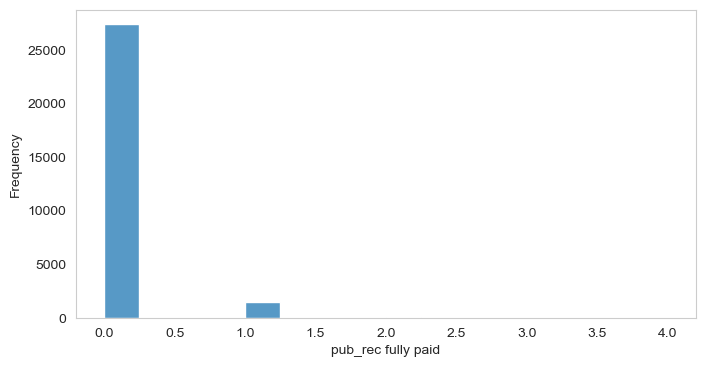

In [94]:
#Fully paid
plot_hist(loan_df, 'pub_rec', 1)

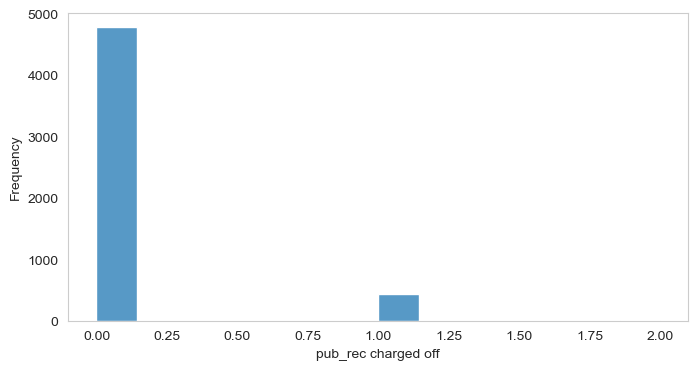

In [95]:
#Charged Off
plot_hist(loan_df, 'pub_rec', 0)

It is observed that Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans, which may be a driving factor for further analysis.

# revol_util

In [96]:
loan_df.groupby('loan_status')['revol_util'].describe()

count       mean        std  min    25%   50%   75%   max
loan_status                                                             
Charged Off   5227.0  54.969212  27.985365  0.0  33.65  57.7  78.3  99.9
Fully Paid   28903.0  46.915090  28.229265  0.0  23.30  46.6  70.1  99.9

<Axes: xlabel='loan_status', ylabel='revol_util'>

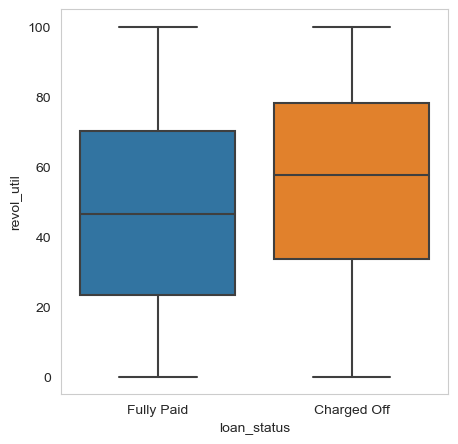

In [97]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['revol_util'] )

# revol_bal

In [98]:
loan_df.groupby('loan_status')['revol_bal'].describe()

count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   5227.0  11720.402143  11056.989255  0.0  3819.0  8682.0   
Fully Paid   28903.0  10805.128291  10686.093411  0.0  3301.0  7866.0   

                 75%      max  
loan_status                    
Charged Off  16149.5  69715.0  
Fully Paid   14718.5  69823.0

<Axes: xlabel='loan_status', ylabel='revol_bal'>

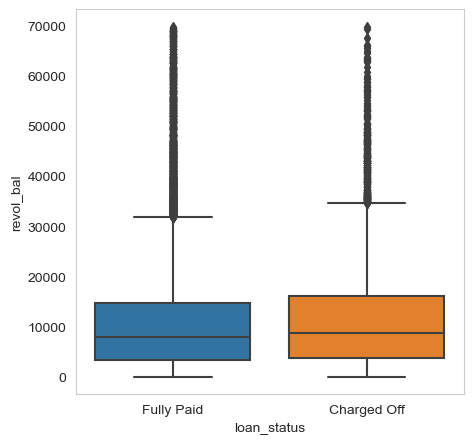

In [99]:
plt.figure(figsize=(5,5))
sns.boxplot(data = loan_df, x= loan_df['loan_status'] ,y =loan_df['revol_bal'] )

It is observed that median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid

# total_acc

In [100]:
# total_acc
loan_df.groupby('loan_status')['total_acc'].describe()

count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   5227.0  20.939353  11.265435  2.0  12.0  19.0  28.0  74.0
Fully Paid   28903.0  21.278864  11.114356  2.0  13.0  20.0  28.0  90.0

It is observed that 'Charged Off' accounts does not differ much from 'Fully Paid' accounts.

# addr_state

<Axes: xlabel='addr_state', ylabel='Count'>

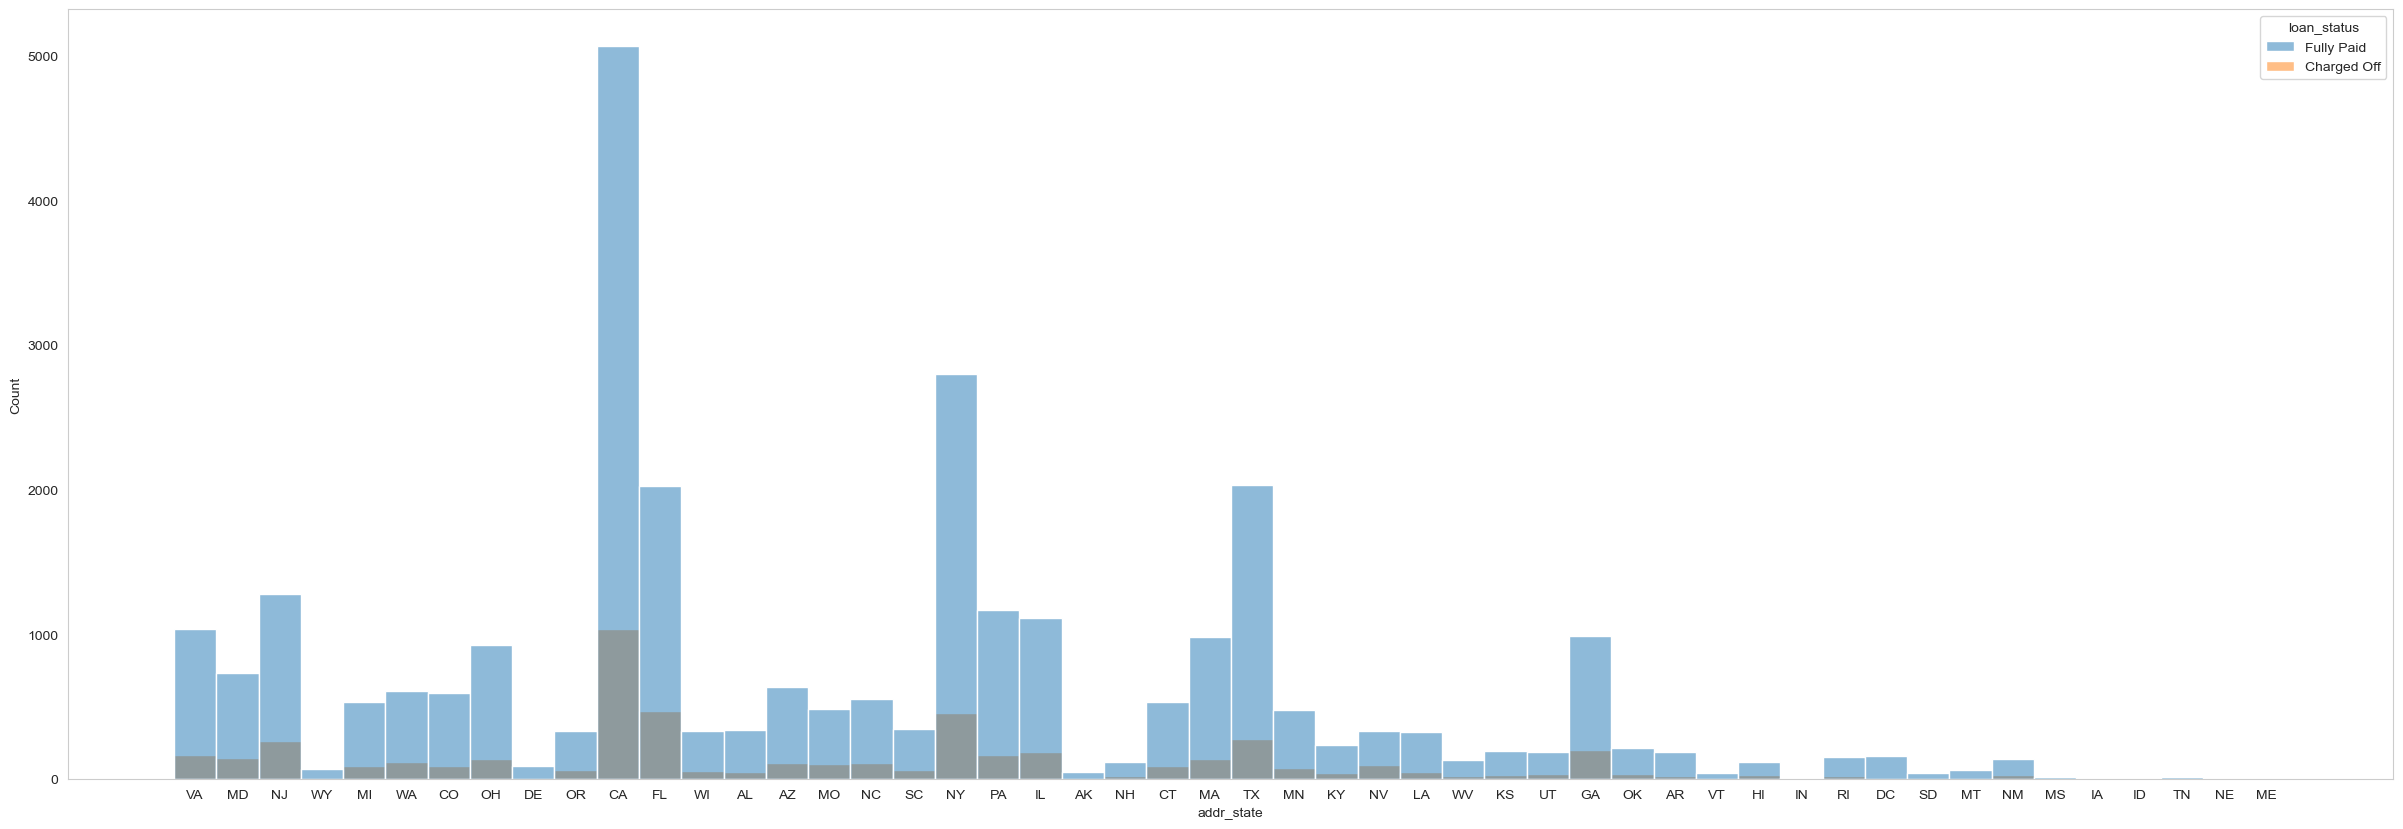

In [101]:
# addr_state
## for Charged-off account
plt.figure(figsize = (30,10))
sns.histplot(x = loan_df['addr_state'], data = loan_df['addr_state'].value_counts(normalize = True), hue = loan_df['loan_status'])

Using 'addr_state' column, both Fully paid and Charged Off loans are too higher for CL compared to other states. So any insights cannot be drawn from the 'addr_state' col

# funded_amnt_inv

In [102]:
#funded_amnt_inv
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

count          mean          std  min     25%     50%  \
loan_status                                                            
Charged Off   5227.0  10087.740862  6787.196517  0.0  4925.0  8700.0   
Fully Paid   28903.0   8643.507925  5095.914548  0.0  4800.0  7950.0   

                      75%      max  
loan_status                         
Charged Off  14500.956265  35000.0  
Fully Paid   12000.000000  25975.0

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

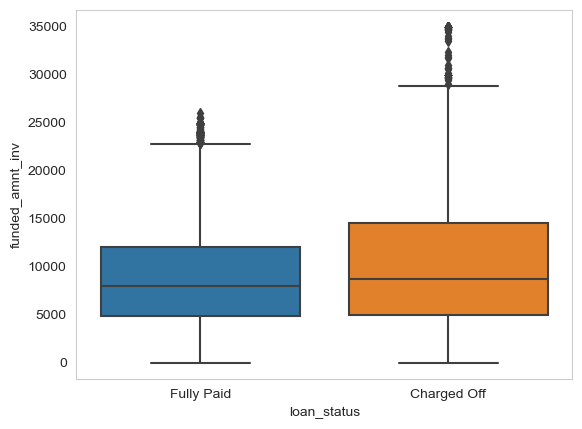

In [103]:
#funded_amnt_inv
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt_inv'])

# funded_amnt

In [104]:
#funded_amnt
loan_df.groupby('loan_status')['funded_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5227.0  10937.105414  6924.385106  900.0  5025.0  10000.0   
Fully Paid   28903.0   9095.976196  5124.136377  500.0  5000.0   8000.0   

                 75%      max  
loan_status                    
Charged Off  15000.0  35000.0  
Fully Paid   12000.0  26000.0

<Axes: xlabel='loan_status', ylabel='funded_amnt'>

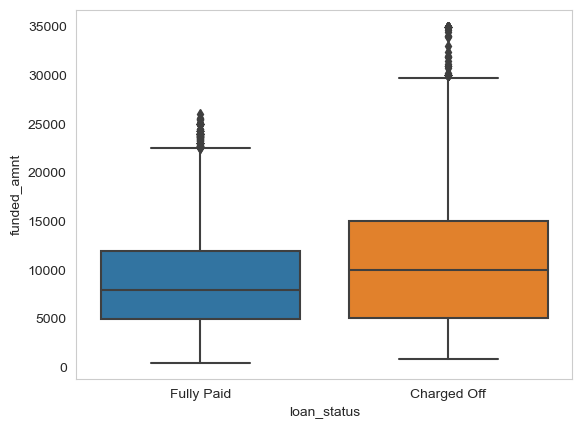

In [105]:
#funded_amnt
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt'])

Charged off loans have higher Funding values than Fully paid loans

# loan_amnt

In [106]:
#loan_amnt
loan_df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5227.0  11264.678592  7287.104229  900.0  5187.5  10000.0   
Fully Paid   28903.0   9315.977580  5408.603386  500.0  5000.0   8000.0   

                 75%      max  
loan_status                    
Charged Off  15250.0  35000.0  
Fully Paid   12300.0  35000.0

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

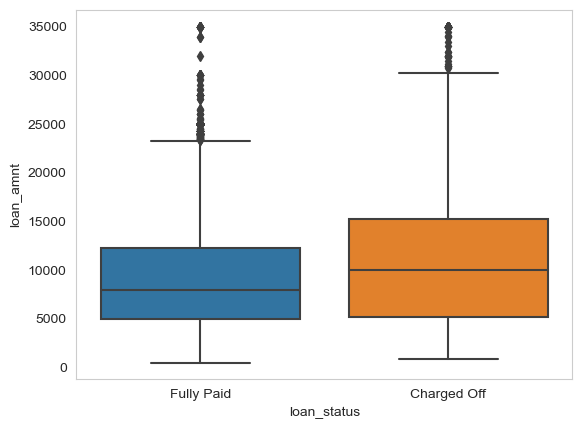

In [107]:
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['loan_amnt'])

loan amount to Charged off loans are higher in comparison to Fully Paid

## Consolidated Observations from Univariate Analysis

1.Charged off loans have higher repayment period.

2.Rental & Mortgage have higher probability of Charged off than rest categories.

3.It is observed that around 49% of the charge off has happened due to debt_consolidation

4.Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is also observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is an opposite trend.

5.Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

6.Charged Off accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%.

7.Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

8.Charged Off loans have marginally higher dti when compared to Fully Paid loans.

9.It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

10.Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans.

11.Median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid.

12.Charged off loans have higher Funding values than Fully paid loans.

13.Loan amount to Charged off loans are higher in comparison to Fully Paid.

# Bivariate Analysis

### Plotting heat map to get correlation factor between Borrower financial attribute and Loan Attributes

In [108]:
loan_df.dtypes

member_id                     int64
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                          int64
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                  float64
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
earliest_cr_line             object
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                  

In [109]:
emp_length_cols = ['loan_amnt','term','int_rate','grade','home_ownership',
                   'annual_inc_cat', 'verification_status','dti', 'earliest_cr_line_yr_cat']

annual_inc_cols = ['loan_amnt','term','int_rate','grade','home_ownership','verification_status', 
                   'dti','earliest_cr_line_yr_cat']

dti_cols = ['loan_amnt','term','int_rate','grade','home_ownership','verification_status','earliest_cr_line_yr_cat']
           
loan_amnt_cols = ['int_rate', 'grade', 'home_ownership', 'verification_status', 'earliest_cr_line_yr_cat']

### comparision with employment length:
['loan_amnt','term','int_rate','grade','home_ownership','annual_inc_cat', 'verification_status','dti', 'earliest_cr_line_yr_cat']

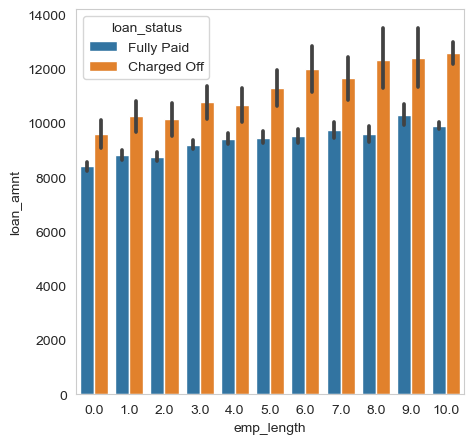

In [110]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

Higher Loan amount (approximately more than 10000) may lead to Charged Off, irrespective of Employment length

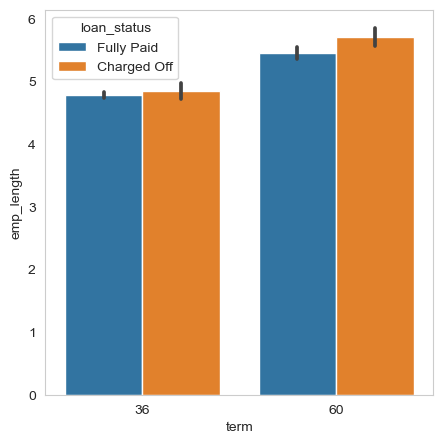

In [111]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'], y= loan_df['emp_length'], hue = loan_df['loan_status'])
plt.show()

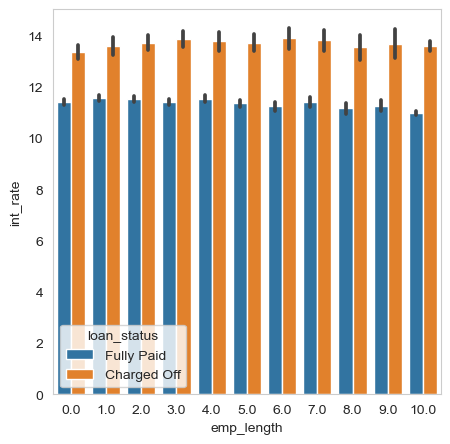

In [112]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

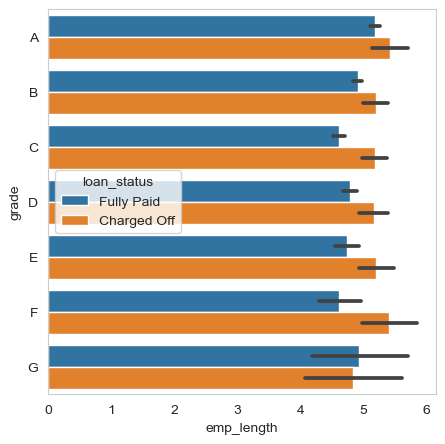

In [113]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['grade'].sort_values(), hue = loan_df['loan_status'])
plt.show()

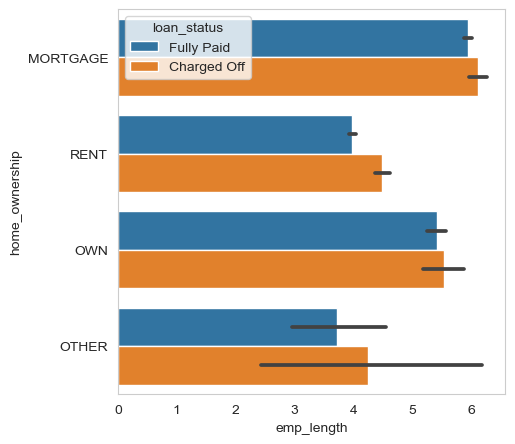

In [114]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['home_ownership'], hue = loan_df['loan_status'])
plt.show()

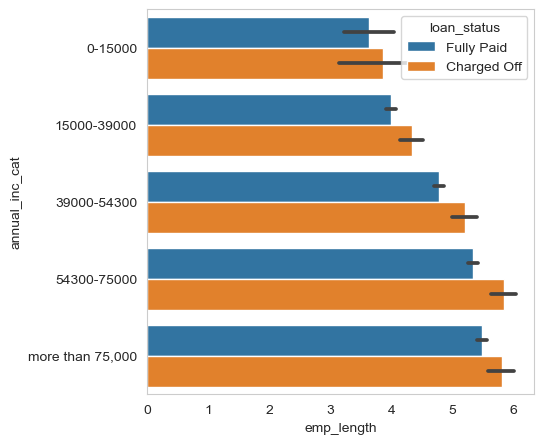

In [115]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['annual_inc_cat'].sort_values(), hue = loan_df['loan_status'])
plt.show()

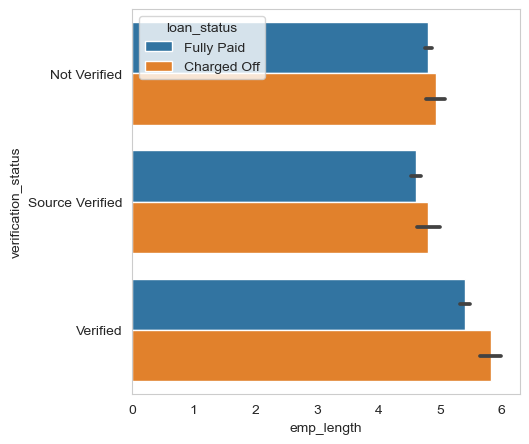

In [116]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['verification_status'], hue = loan_df['loan_status'])
plt.show()

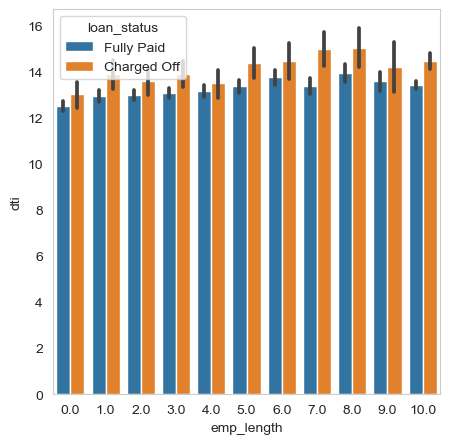

In [117]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['dti'], hue = loan_df['loan_status'])
plt.show()

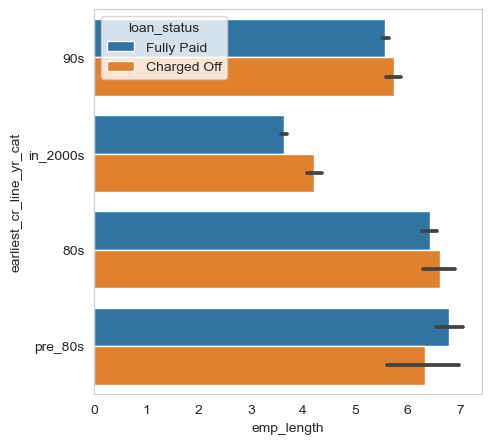

In [118]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['emp_length'] , y = loan_df['earliest_cr_line_yr_cat'], hue = loan_df['loan_status'])
plt.show()

#### Annual Income comaprison with 
['loan_amnt','term','int_rate','grade','home_ownership','verification_status','dti','earliest_cr_line_yr_cat']

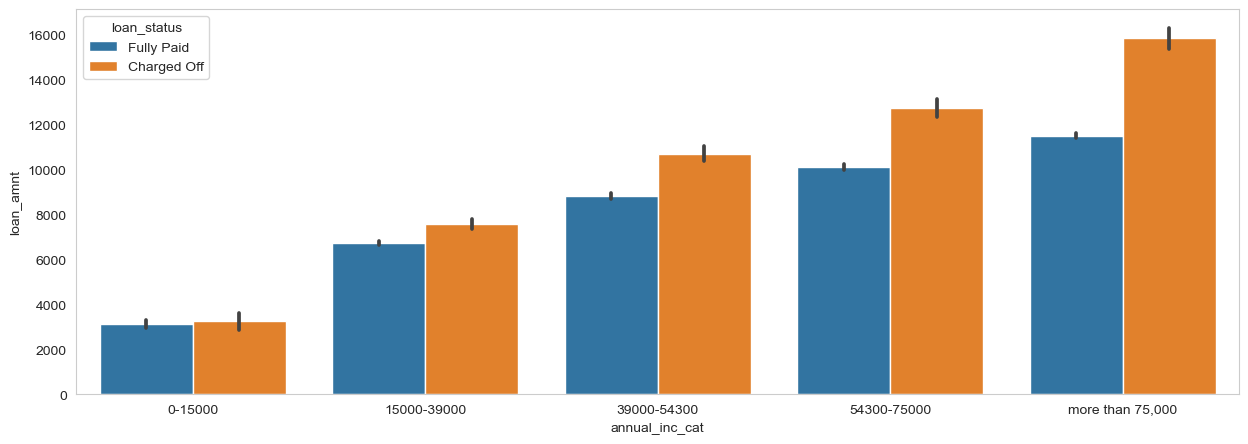

In [119]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'].sort_values() , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

In [120]:
df_charged = df_ls_inc_merged[df_ls_inc_merged['loan_status']== 'Charged Off'][['annual_inc_cat','loan_amnt_%']]

df_charged

annual_inc_cat  loan_amnt_%
0           0-15000    24.862254
2       15000-39000    19.509081
4       39000-54300    18.626430
6       54300-75000    17.854612
8  more than 75,000    16.586795

Approving higher Loan amnount leads to more Charged-Off, this is also observed in Univariate analysis that higher Loan amount are more likely to default.

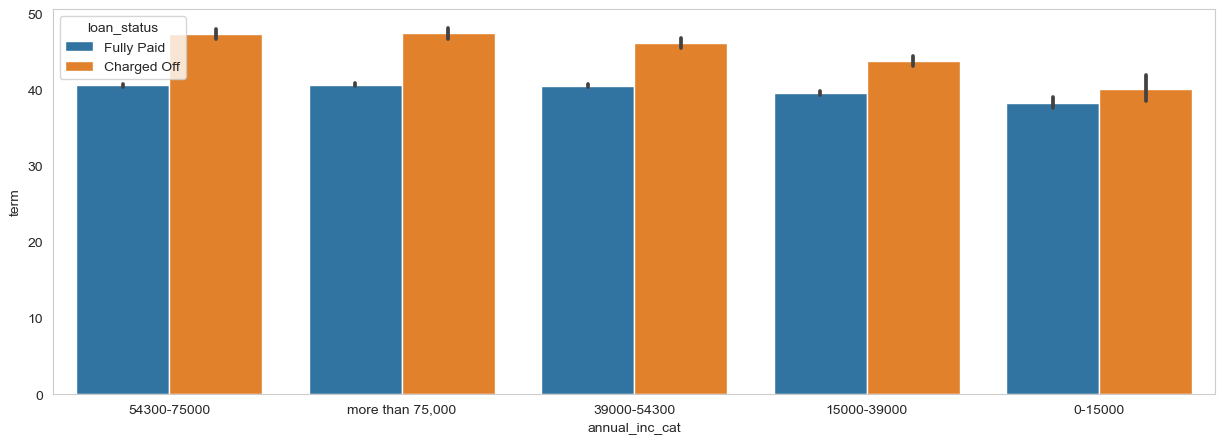

In [121]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'] , y = loan_df['term'], hue = loan_df['loan_status'])
plt.show()

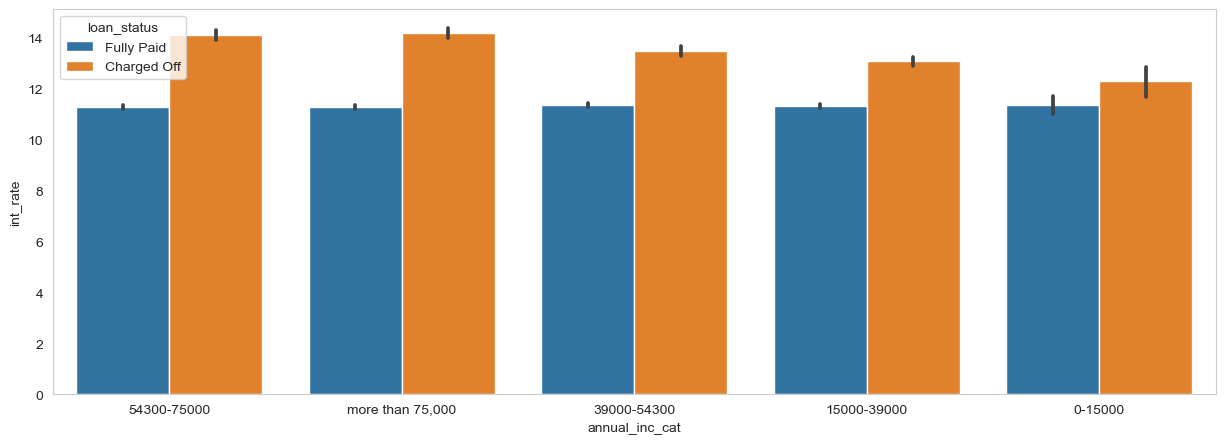

In [122]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

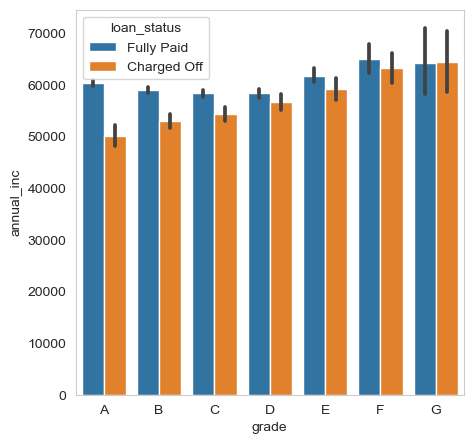

In [123]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['annual_inc'] , x = loan_df['grade'].sort_values(), hue = loan_df['loan_status'])
plt.show()

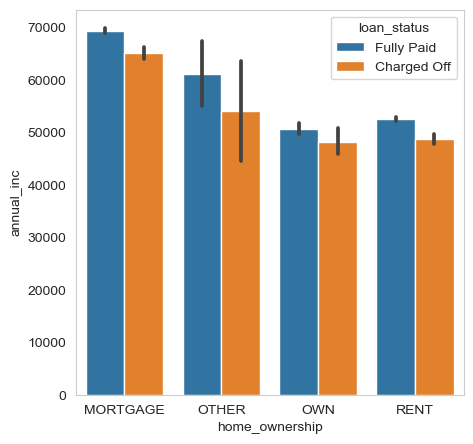

In [124]:
plt.figure(figsize = (5,5))
sns.barplot(y = loan_df['annual_inc'] , x = loan_df['home_ownership'].sort_values(), hue = loan_df['loan_status'])
plt.show()

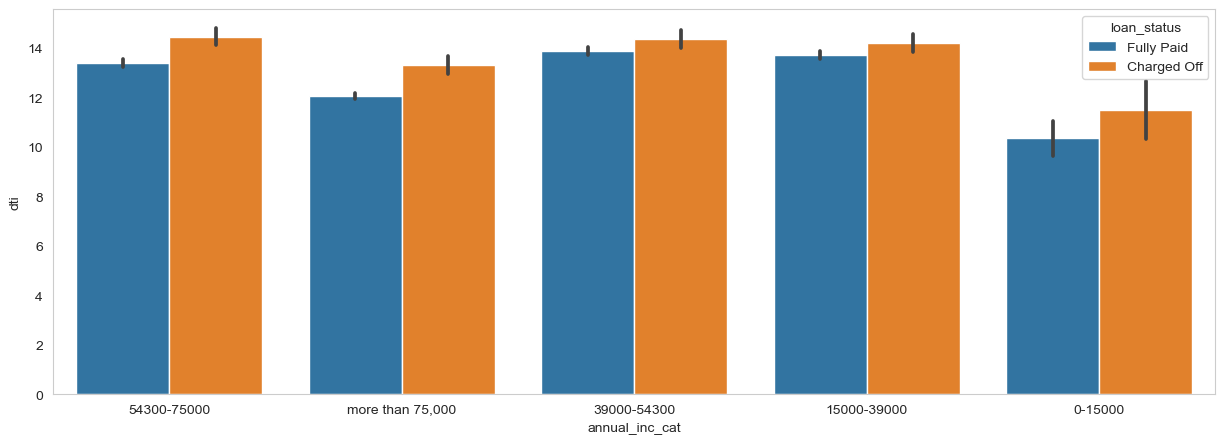

In [125]:
plt.figure(figsize = (15,5))
sns.barplot(x = loan_df['annual_inc_cat'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

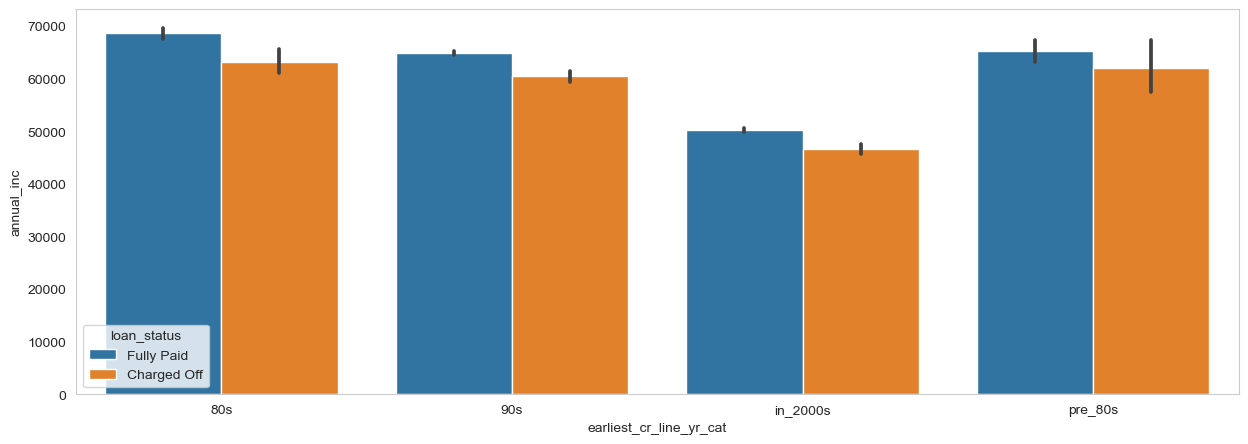

In [126]:
plt.figure(figsize = (15,5))
sns.barplot(y = loan_df['annual_inc'] , x = loan_df['earliest_cr_line_yr_cat'].sort_values(), hue = loan_df['loan_status'])
plt.show()

### dti comparison with ['loan_amnt','term','int_rate','grade','home_ownership','verification_status','earliest_cr_line_yr_cat']

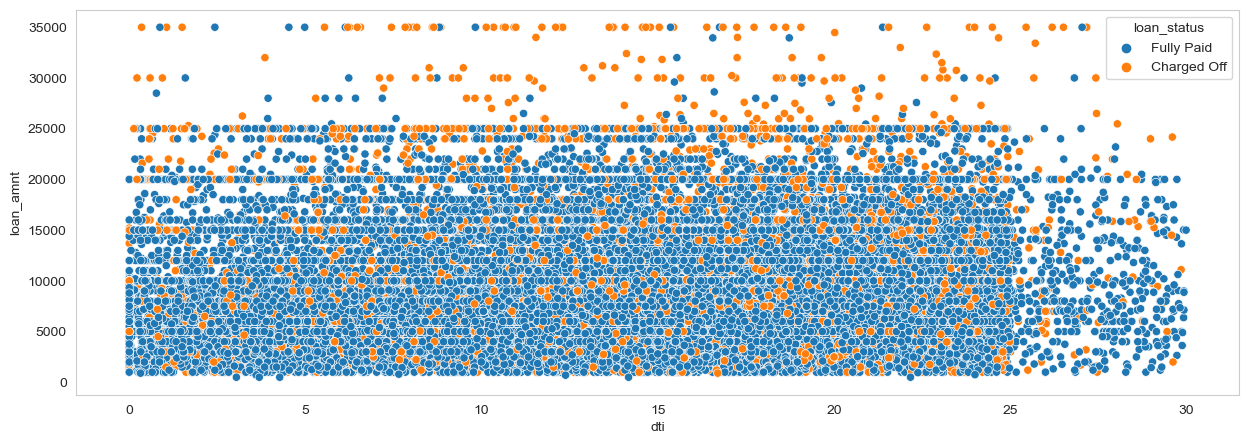

In [127]:
plt.figure(figsize = (15,5))
sns.scatterplot(y = loan_df['loan_amnt'] , x = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

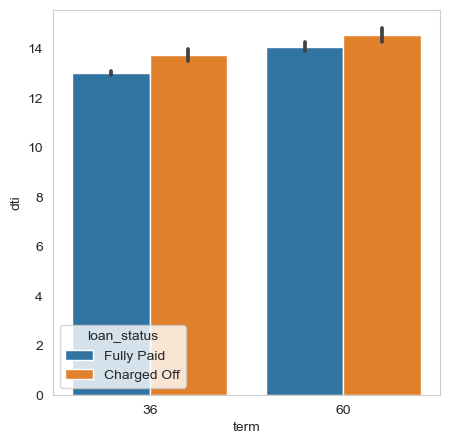

In [128]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

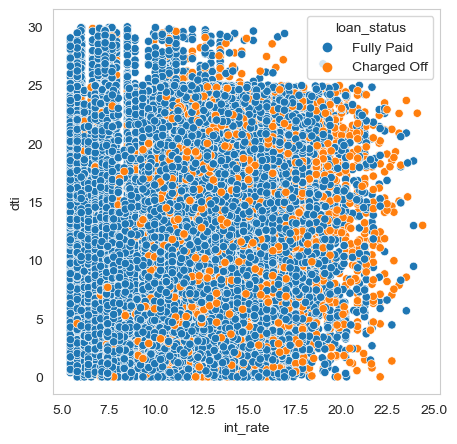

In [129]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = loan_df['int_rate'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

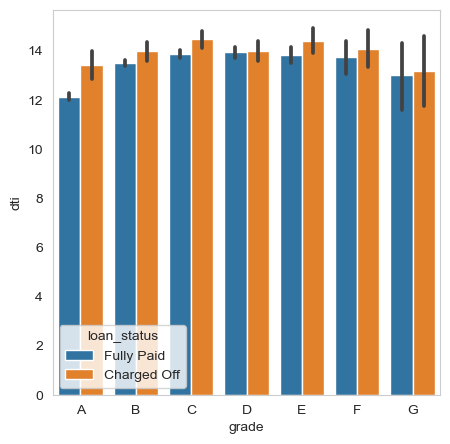

In [130]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['grade'].sort_values() , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

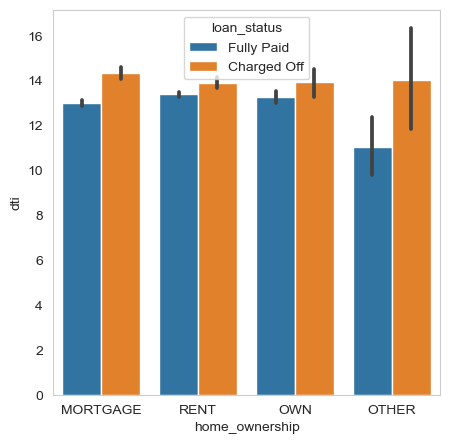

In [131]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

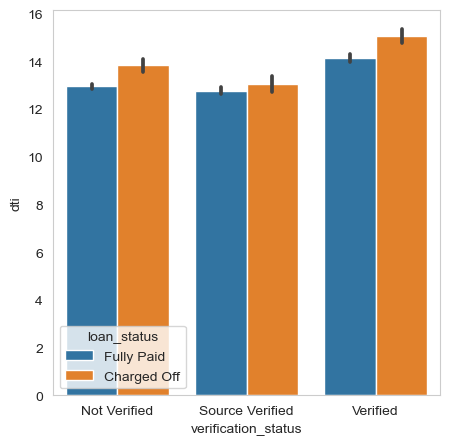

In [132]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['verification_status'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

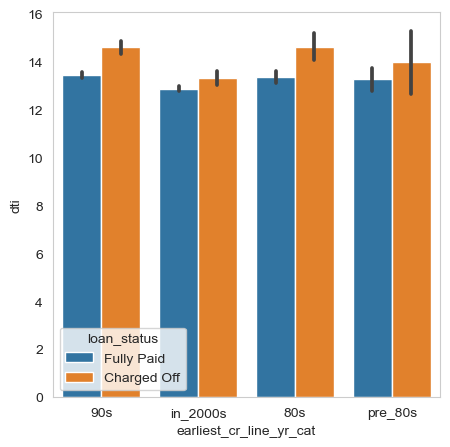

In [133]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['earliest_cr_line_yr_cat'] , y = loan_df['dti'].sort_values(), hue = loan_df['loan_status'])
plt.show()

### Loan Amount in comparison with 'int_rate', 'grade', 'home_ownership', 'verification_status', 'earliest_cr_line_yr_cat']

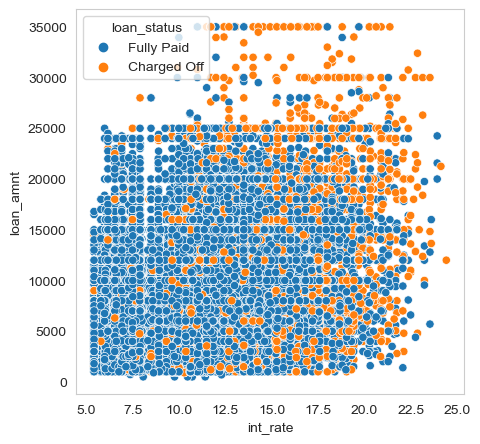

In [134]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = loan_df['int_rate'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

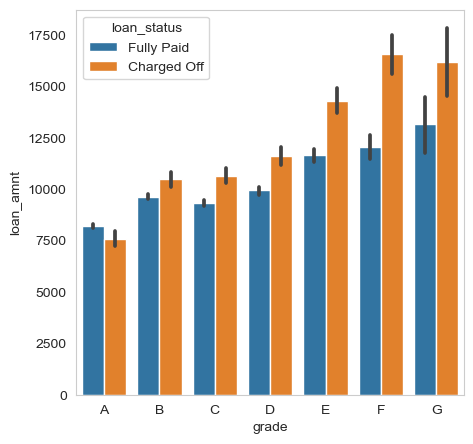

In [135]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['grade'].sort_values() , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

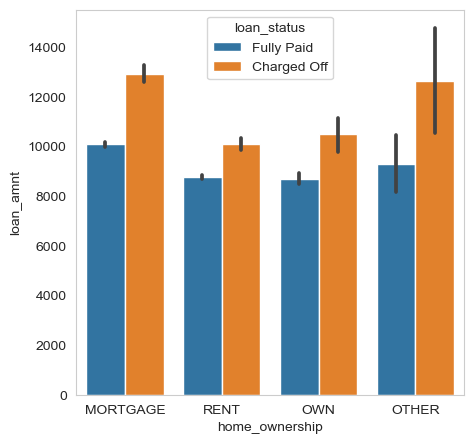

In [136]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

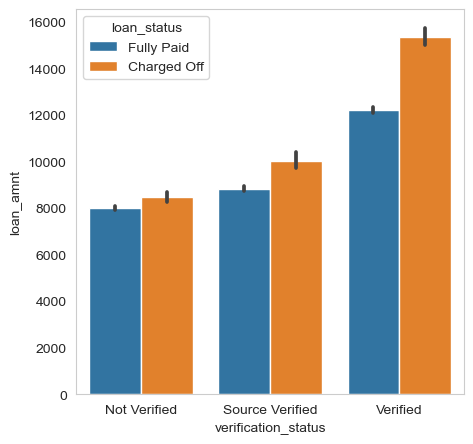

In [137]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['verification_status'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

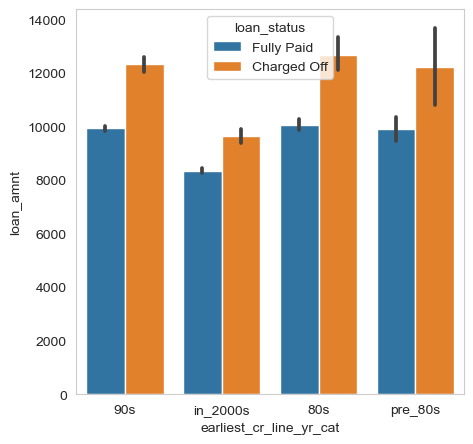

In [138]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['earliest_cr_line_yr_cat'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

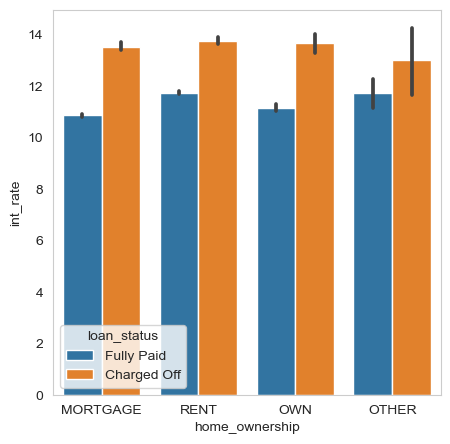

In [139]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['home_ownership'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

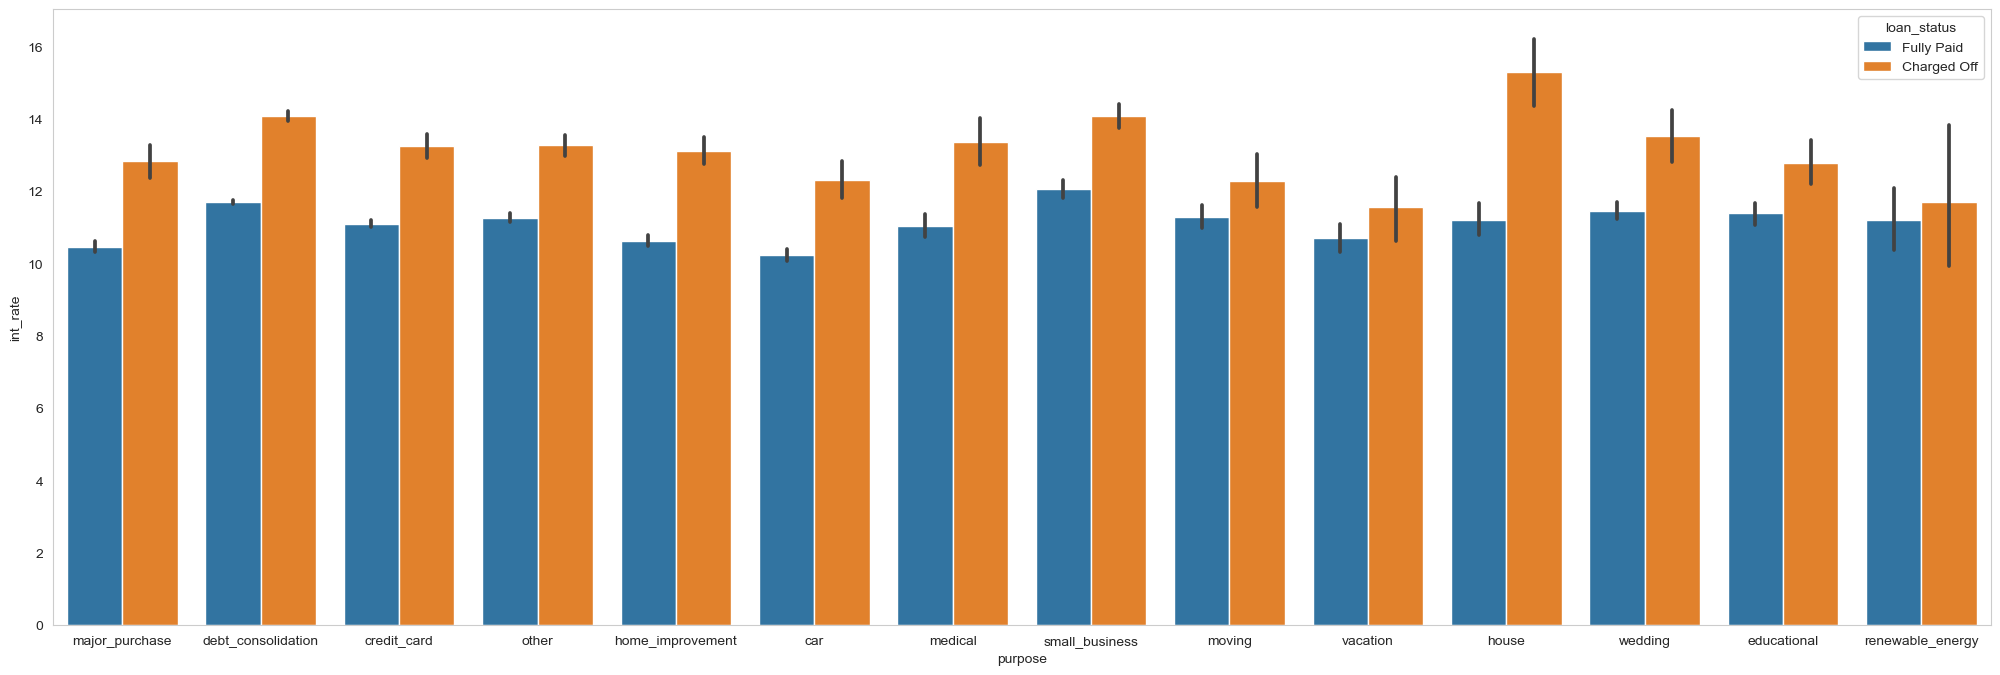

In [140]:
plt.figure(figsize = (25,8))
sns.barplot(x = loan_df['purpose'] , y = loan_df['int_rate'], hue = loan_df['loan_status'] )
plt.show()

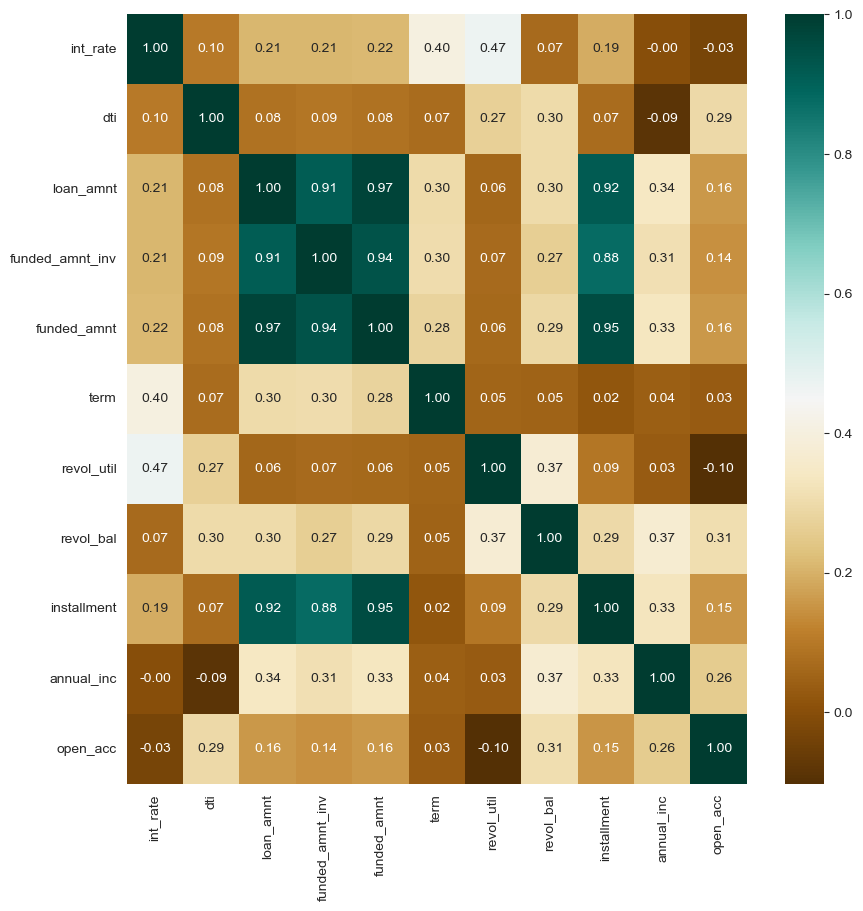

In [141]:
plt.figure(figsize = (10,10))
sns.heatmap(loan_df[['int_rate','dti', 'loan_amnt', 'funded_amnt_inv','funded_amnt', 'term', 'revol_util','revol_bal',
                     'installment','annual_inc', 'open_acc']].corr(), cmap='BrBG',
            annot = True, fmt = '.2f' )
plt.show()

<Figure size 500x500 with 0 Axes>

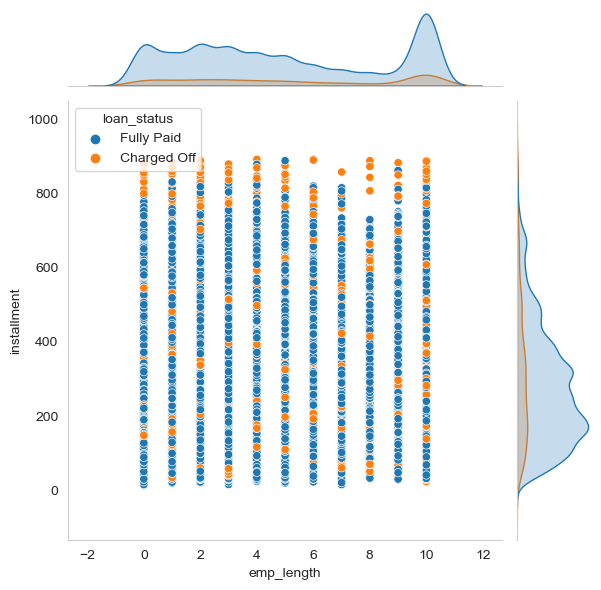

In [142]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['emp_length'] , y = loan_df['installment'], hue = loan_df['loan_status'])
plt.show()

<Figure size 500x500 with 0 Axes>

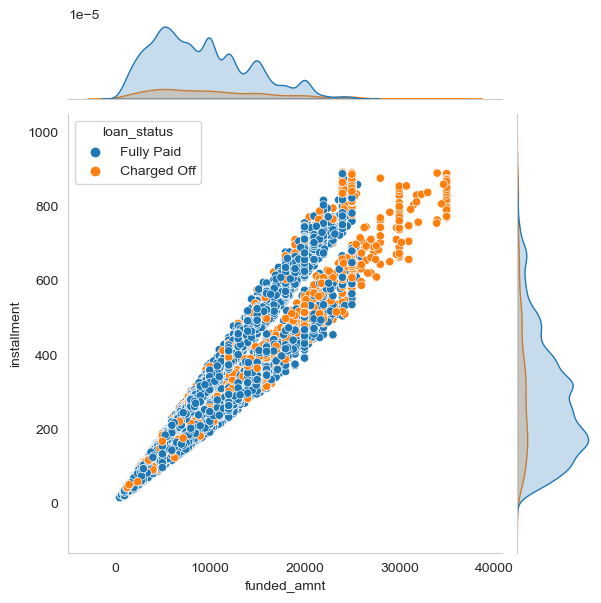

In [143]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['funded_amnt'] , y = loan_df['installment'], hue = loan_df['loan_status'])
plt.show()

<Figure size 500x500 with 0 Axes>

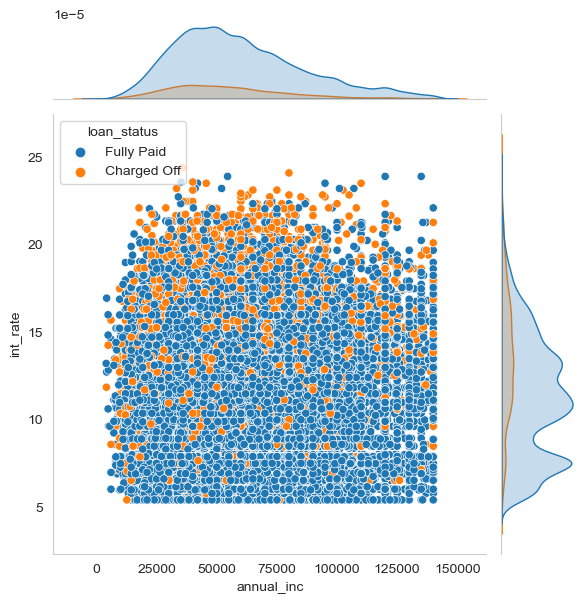

In [144]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['annual_inc'] , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()

<Figure size 500x500 with 0 Axes>

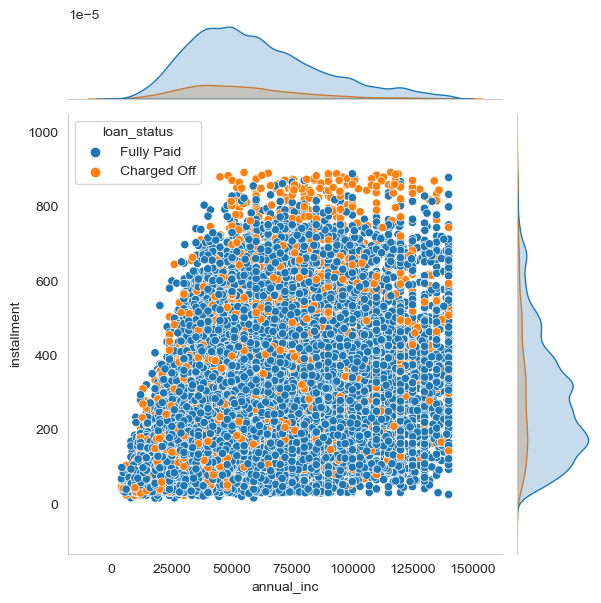

In [145]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['annual_inc'] , y = loan_df['installment'], hue = loan_df['loan_status'])
plt.show()

<Figure size 500x500 with 0 Axes>

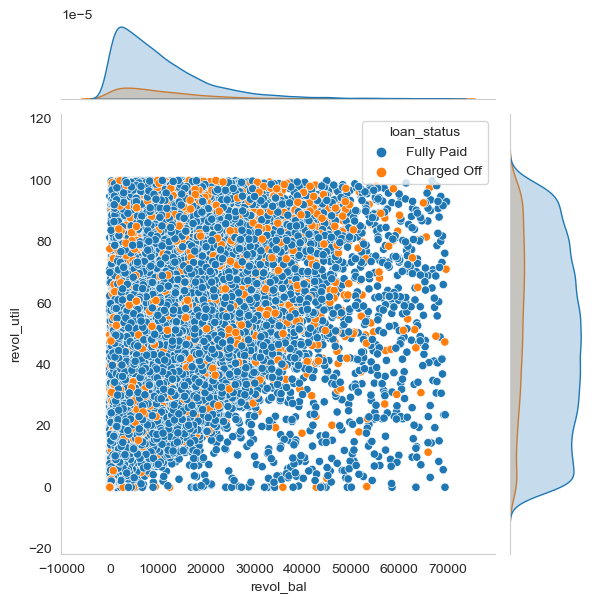

In [146]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['revol_bal'] , y = loan_df['revol_util'], hue = loan_df['loan_status'])
plt.show()

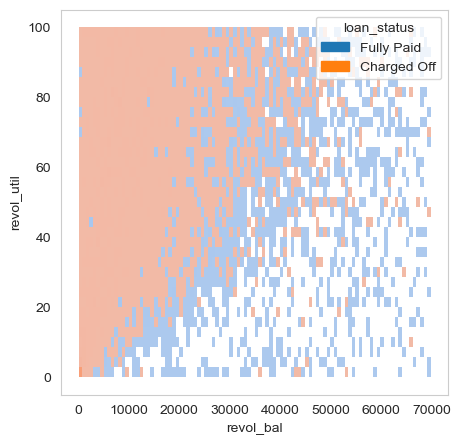

In [147]:
plt.figure(figsize = (5,5))
sns.histplot(x = loan_df['revol_bal'] , y = loan_df['revol_util'], hue = loan_df['loan_status'])
plt.show()

<Figure size 500x500 with 0 Axes>

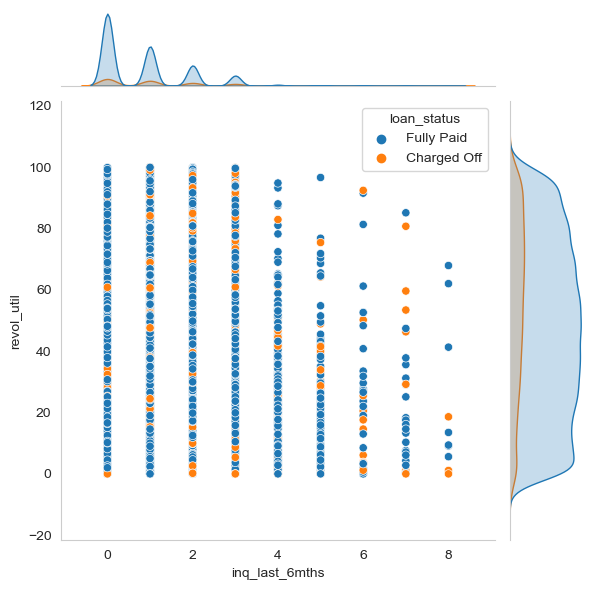

In [148]:
plt.figure(figsize = (5,5))
sns.jointplot(x = loan_df['inq_last_6mths'] , y = loan_df['revol_util'], hue = loan_df['loan_status'])
plt.show()

<Figure size 500x500 with 0 Axes>

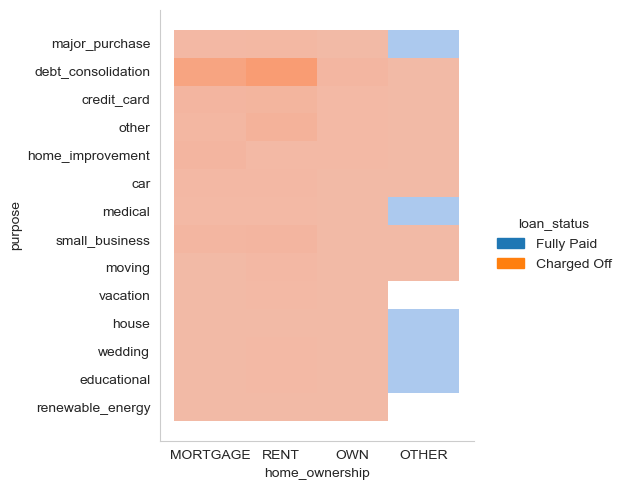

In [149]:
plt.figure(figsize = (5,5))
sns.displot(x = loan_df['home_ownership'] , y = loan_df['purpose'], hue = loan_df['loan_status'])
plt.show()

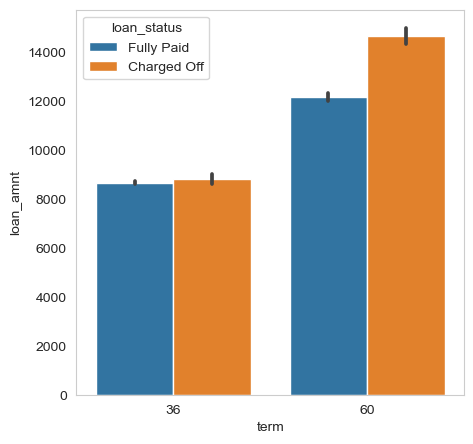

In [150]:
plt.figure(figsize = (5,5))
sns.barplot(x = loan_df['term'] , y = loan_df['loan_amnt'], hue = loan_df['loan_status'])
plt.show()

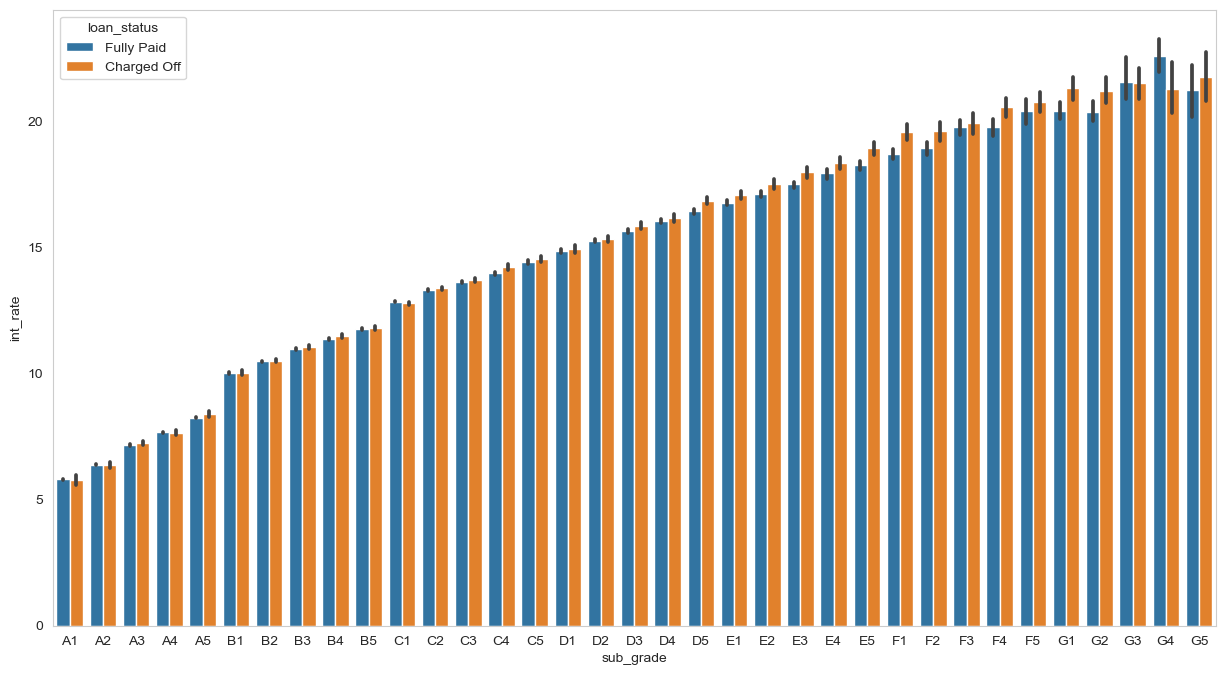

In [151]:
plt.figure(figsize = (15,8))
sns.barplot(x = loan_df['sub_grade'].sort_values() , y = loan_df['int_rate'], hue = loan_df['loan_status'])
plt.show()